# Assignment 4: Customer Personality Analysis - Segmentation 

https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

In [1]:
# Import necessary libraries 

# Data Analysis and Visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Scaling
from sklearn.preprocessing import StandardScaler

# Modelling 
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from sklearn import metrics
from sklearn.metrics import silhouette_score

from sklearn import cluster

import scipy
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from scipy import cluster

In [2]:
# Read in the data and view the first 5 rows

customer_data = pd.read_csv("marketing_campaign.csv", sep = "\t") # tab seperated values 

customer_data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

## Data Key 

- **People**
    - ID: Customer's unique identifier
    - Year_Birth: Customer's birth year
    - Education: Customer's education level
    - Marital_Status: Customer's marital status
    - Income: Customer's yearly household income
    - Kidhome: Number of children in customer's household
    - Teenhome: Number of teenagers in customer's household
    - Dt_Customer: Date of customer's enrollment with the company
    - Recency: Number of days since customer's last purchase
    - Complain: 1 if the customer complained in the last 2 years, 0 otherwise
- **Products**
    - MntWines: Amount spent on wine in last 2 years
    - MntFruits: Amount spent on fruits in last 2 years
    - MntMeatProducts: Amount spent on meat in last 2 years
    - MntFishProducts: Amount spent on fish in last 2 years
    - MntSweetProducts: Amount spent on sweets in last 2 years
    - MntGoldProds: Amount spent on gold in last 2 years 
- **Promotion**
    - NumDealsPurchases: Number of purchases made with a discount
    - AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
    - AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
    - AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
    - AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
    - AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
    - Response: 1 if customer accepted the offer in the last campaign, 0 otherwise 
- **Place**
    - NumWebPurchases: Number of purchases made through the company’s website
    - NumCatalogPurchases: Number of purchases made using a catalogue
    - NumStorePurchases: Number of purchases made directly in stores
    - NumWebVisitsMonth: Number of visits to company’s website in the last month

## Exploratory Data Analysis

In [7]:
# View data types and shape of the data 

customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

**There are 2240 observations or in this case customers and 29 features**

Some of the categorical data are already in numeric form but it would be good to understand the proportion of customers in each category. 

In [11]:
# Rename of columns

customer_data.columns = ['ID', 'BirthYear', 'Education', 'MaritalStatus', 'Income', 'KidHome',
       'TeenHome', 'DateCustomer', 'Recency', 'Wines', 'Fruits',
       'Meats', 'Fish', 'Sweets','Gold', 'Deals', 'Web','Catalog', 'Store', 'WebVisitsMonth',
       'C3', 'C4', 'C5', 'C1', 'C2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'C6']

In [13]:
# Create variables 

# TotalSpending 
customer_data["TotalSpending"] = customer_data["Wines"] + \
customer_data["Fruits"] + \
customer_data["Meats"] + \
customer_data["Fish"] + \
customer_data["Sweets"] + \
customer_data["Gold"]

# Children
customer_data["Children"] = customer_data["KidHome"] + customer_data["TeenHome"]

### Categorical data

In [16]:
# Convert variables to categorical 

cols_to_cat = ["Complain", "C1",  "C2", "C3", "C4", "C5", "C6"]

for col in cols_to_cat:
    customer_data[col] = customer_data[col].astype("object")

In [18]:
# Look at the unique values for Education and Married categories 

# Education level acheived 
print(f'Education Categories: {customer_data["Education"].unique()}')

      
# Marriage status
print(f'Marital Status: {customer_data["MaritalStatus"].unique()}')

Education Categories: ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Marital Status: ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [20]:
# Condense categoris 

customer_data["Education"] = customer_data["Education"].map({"Graduation":"Postgraduate", 
                                                             "PhD":"Postgraduate",
                                                             "Master":"Postgraduate",
                                                             "Basic":"Undergraduate",
                                                             "2n Cycle":"Undergraduate"})

customer_data["MaritalStatus"] = customer_data["MaritalStatus"].map({"Widow":"Single", 
                                                                    "Alone":"Single",
                                                                    "Absurd":"Single",
                                                                    "YOLO":"Single",
                                                                    "Together":"Couple",
                                                                    "Divorced":"Single",
                                                                    "Married":"Couple"})

In [22]:
# Obtain summary statistics of the categorical features 

cat_stats = customer_data.describe(include = "object").T
cat_stats["top_percent"] = (cat_stats["freq"]/cat_stats["count"]) * 100 
cat_stats

count unique           top  freq top_percent
Education      2240      2  Postgraduate  1983   88.526786
MaritalStatus  1760      2        Couple  1444   82.045455
DateCustomer   2240    663    31-08-2012    12    0.535714
C3             2240      2             0  2077   92.723214
C4             2240      2             0  2073   92.544643
C5             2240      2             0  2077   92.723214
C1             2240      2             0  2096   93.571429
C2             2240      2             0  2210   98.660714
Complain       2240      2             0  2219     99.0625
C6             2240      2             0  1906   85.089286

In [24]:
# Visualize the distributions of categorical variables

# Create variable with categorical columns 
cat_columns = customer_data.describe(include = "object").T.index
cat_columns = list(cat_columns)
cat_columns.remove("DateCustomer")

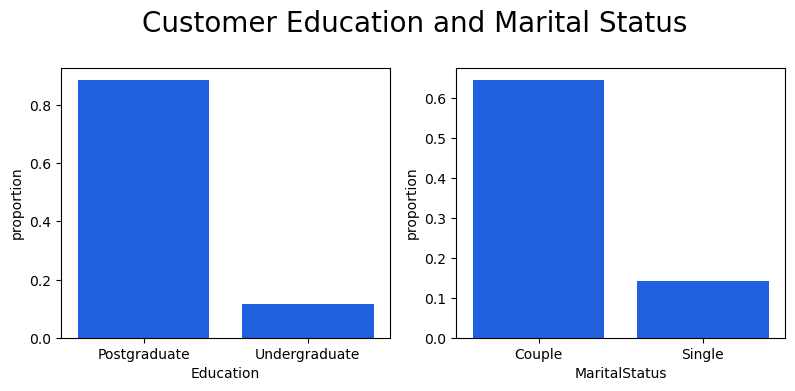

In [26]:
# Create plot with education and marital status 
plt.figure(figsize = (12,10))

for i in range(len(cat_columns[0:2])):
    plt.subplot(3,3,i+1)
    sns.countplot(data = customer_data,
                  x = cat_columns[i],
                  stat = "proportion", 
                  color = '#0056ff')
    plt.xticks(rotation = 0)

plt.suptitle("Customer Education and Marital Status", y = 1, x = 0.35,
            fontsize = 20)
# plt.figtext(x = 0.5, y = -0.03, s = "Fig. 1", fontstyle = "italic", fontweight = "demibold", fontsize = 12)
plt.tight_layout()

In [28]:
cat_columns[2:]

['C3', 'C4', 'C5', 'C1', 'C2', 'Complain', 'C6']

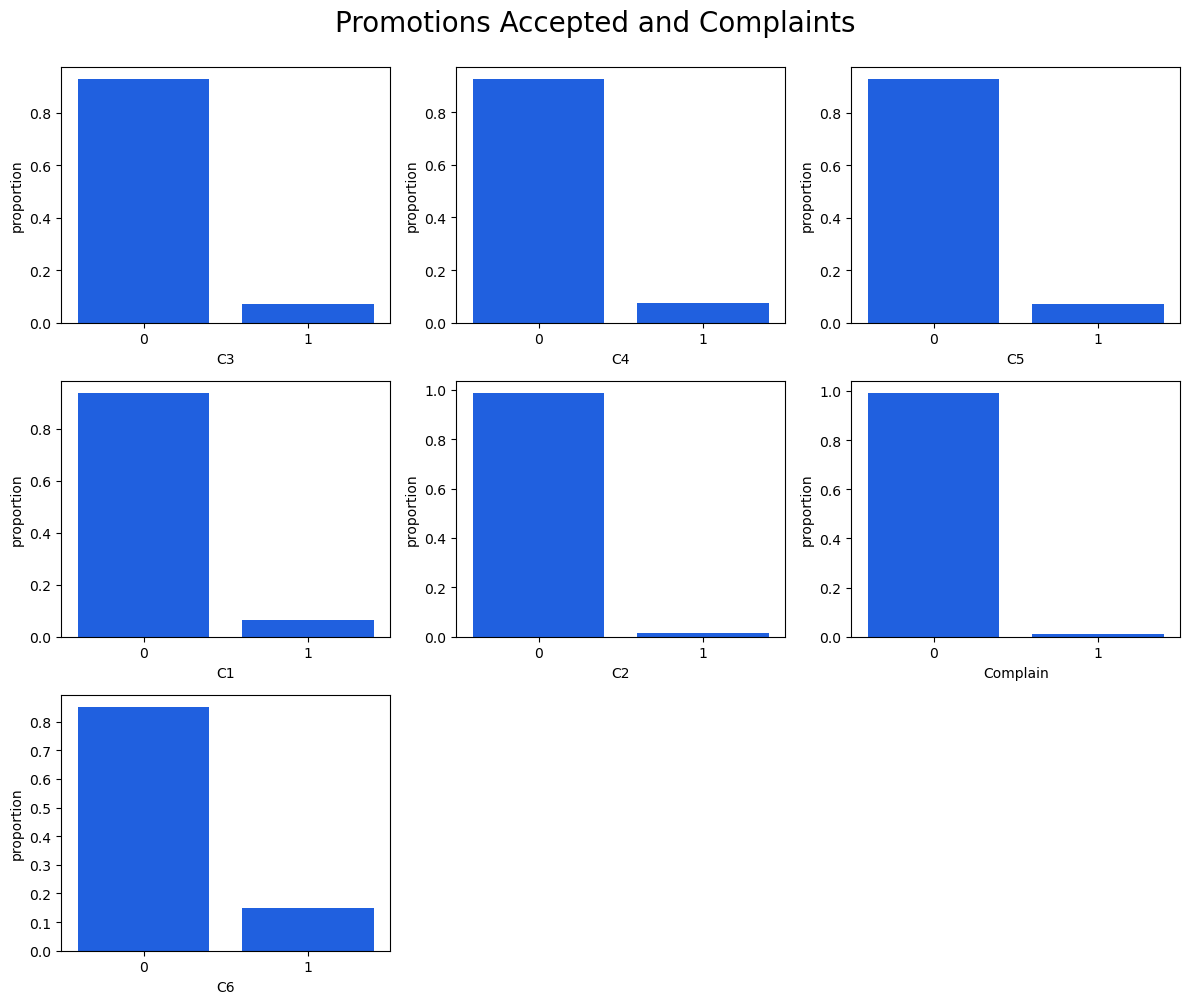

In [34]:
# Create plot with education and marital status 
plt.figure(figsize = (12,10))

for i in range(len(cat_columns[2:])):
    plt.subplot(3,3,i+1)
    sns.countplot(data = customer_data,
                  x = cat_columns[i+2],
                  stat = "proportion", 
                  color = '#0056ff')
    plt.xticks(rotation = 0)

plt.suptitle("Promotions Accepted and Complaints", y = 1, x = 0.5,
            fontsize = 20)
# plt.figtext(x = 0.5, y = -0.03, s = "Fig. 1", fontstyle = "italic", fontweight = "demibold", fontsize = 12)
plt.tight_layout()

### Continuous data

There are a few columns that can be used to generate more meaningful attributes of the customer
1. Get their age from the Year_Birth column
2. Get the amount of time each customer has been with the company from the Dt_customer column

In [38]:
# Create a new column with each customers estimated age from their birth year

customer_data["Age"] = 2024 - customer_data["BirthYear"]

In [40]:
# Create a new column to obtain the number of years a customer has been with the company 
# format = 04-09-2012
customer_data["DateCustomer"] = pd.to_datetime(customer_data["DateCustomer"], format = "%d-%m-%Y")

customer_data["Company_yrs"] = 2024 - customer_data["DateCustomer"].dt.year

In [42]:
# Obtain summary statistics of the numeric features 

customer_data.describe(include = ["int64", "float64"]).T

count          mean           std     min       25%      50%  \
ID              2240.0   5592.159821   3246.662198     0.0   2828.25   5458.5   
BirthYear       2240.0   1968.805804     11.984069  1893.0   1959.00   1970.0   
Income          2216.0  52247.251354  25173.076661  1730.0  35303.00  51381.5   
KidHome         2240.0      0.444196      0.538398     0.0      0.00      0.0   
TeenHome        2240.0      0.506250      0.544538     0.0      0.00      0.0   
Recency         2240.0     49.109375     28.962453     0.0     24.00     49.0   
Wines           2240.0    303.935714    336.597393     0.0     23.75    173.5   
Fruits          2240.0     26.302232     39.773434     0.0      1.00      8.0   
Meats           2240.0    166.950000    225.715373     0.0     16.00     67.0   
Fish            2240.0     37.525446     54.628979     0.0      3.00     12.0   
Sweets          2240.0     27.062946     41.280498     0.0      1.00      8.0   
Gold            2240.0     44.021875     52.167439     0.0      9.00     24.0   
Deals           2240.0      2.325000      1.932238     0.0      1.00      2.0   
Web             2240.0      4.084821      2.778714     0.0      2.00      4.0   
Catalog         2240.0      2.662054      2.923101     0.0      0.00      2.0   
Store           2240.0      5.790179      3.250958     0.0      3.00      5.0   
WebVisitsMonth  2240.0      5.316518      2.426645     0.0      3.00      6.0   
Z_CostContact   2240.0      3.000000      0.000000     3.0      3.00      3.0   
Z_Revenue       2240.0     11.000000      0.000000    11.0     11.00     11.0   
TotalSpending   2240.0    605.798214    602.249288     5.0     68.75    396.0   
Children        2240.0      0.950446      0.751803     0.0      0.00      1.0   
Age             2240.0     55.194196     11.984069    28.0     47.00     54.0   

                     75%       max  
ID               8427.75   11191.0  
BirthYear        1977.00    1996.0  
Income          68522.00  666666.0  
KidHome             1.00       2.0  
TeenHome            1.00       2.0  
Recency            74.00      99.0  
Wines             504.25    1493.0  
Fruits             33.00     199.0  
Meats             232.00    1725.0  
Fish               50.00     259.0  
Sweets             33.00     263.0  
Gold               56.00     362.0  
Deals               3.00      15.0  
Web                 6.00      27.0  
Catalog             4.00      28.0  
Store               8.00      13.0  
WebVisitsMonth      7.00      20.0  
Z_CostContact       3.00       3.0  
Z_Revenue          11.00      11.0  
TotalSpending    1045.50    2525.0  
Children            1.00       3.0  
Age                65.00     131.0

In [44]:
# Inspect observations where age is greater than 90

customer_data[customer_data["Age"] >= 90]

# Drop the three observations as this may not reflect correct data

customer_data.drop(index = [192, 239, 339], inplace = True)

customer_data.reset_index(inplace = True, drop = True)

In [46]:
# Visualize the distribution of the continuous variables (exclude: ID, Z_CostContact, Z_Revenue)

cont_columns = customer_data.describe(include = ["int64", "float64"]).T.index
cont_columns = list(cont_columns)

cont_columns.remove("ID")
cont_columns.remove("Z_CostContact")
cont_columns.remove("TeenHome")
cont_columns.remove("KidHome")
cont_columns.remove("Z_Revenue")

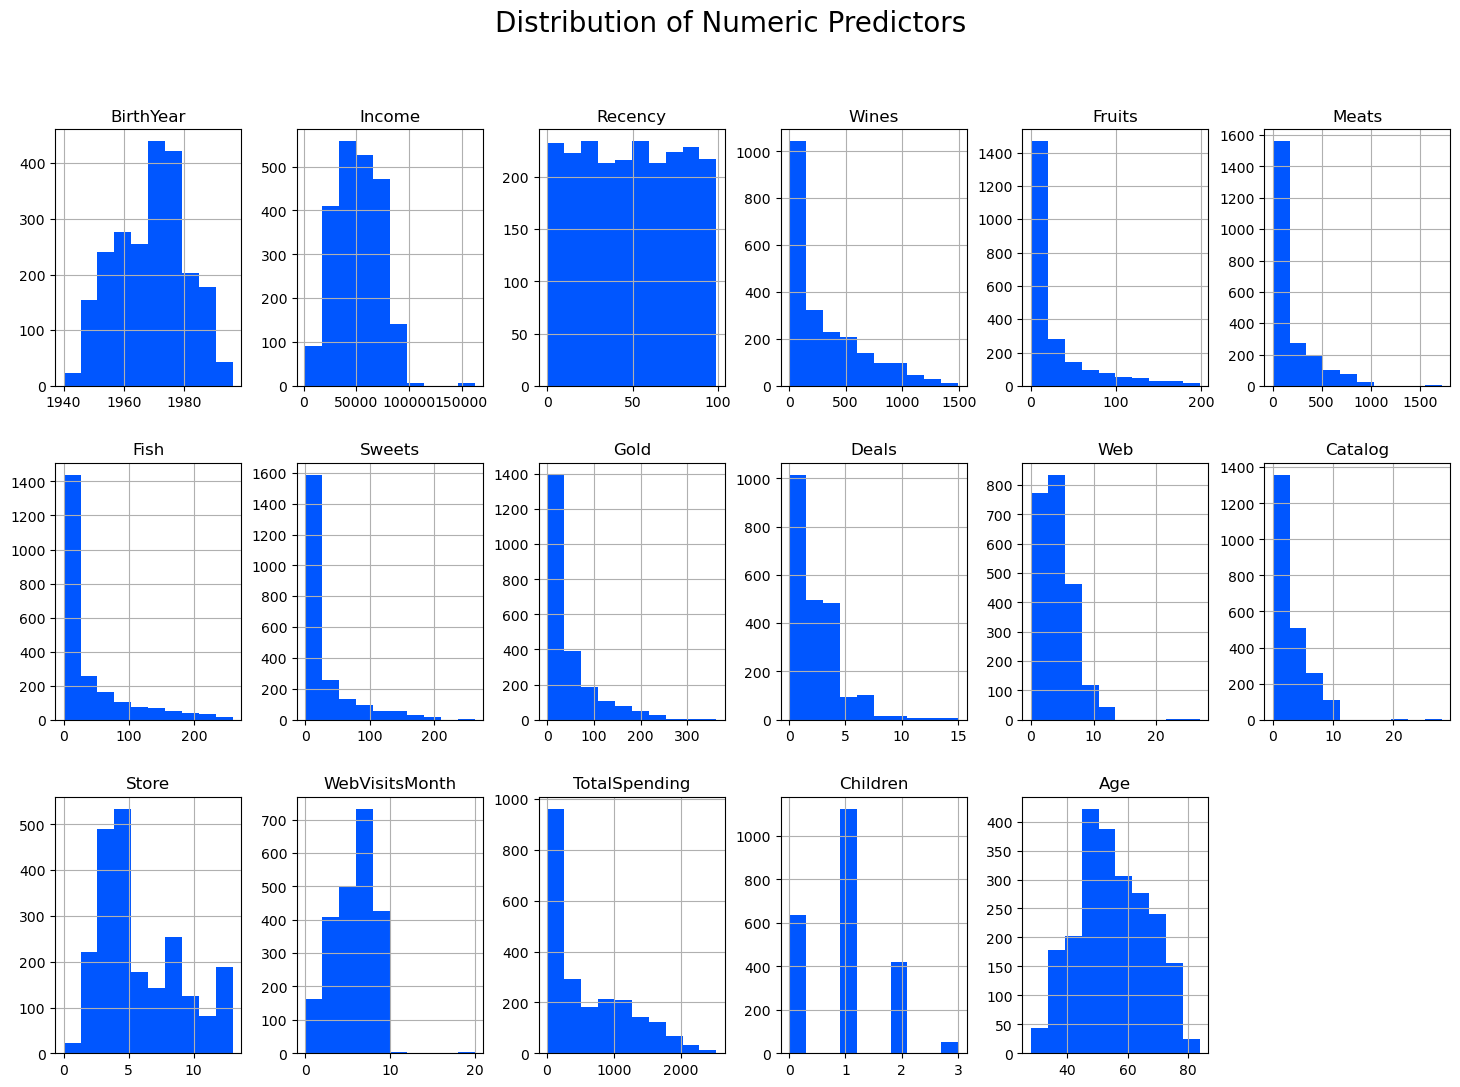

In [311]:
# Create a histogram to visualize the distributions of the numeric variables 

customer_data.loc[0:, cont_columns].hist(figsize = (18,12), layout=(3,6), color = '#0056ff')
plt.suptitle("Distribution of Numeric Predictors", fontsize = 20)
#plt.figtext(x = 0.5, y = 0.05, s = "Fig. 2", fontstyle = "italic", fontweight = "demibold", fontsize = 12)
plt.show()

Initial observations of the continuous variables 

- Most of the continuous variables are right skewed so before fitting a model, these will need to be scaled
- Find outliers in the data and remove them. 

In [51]:
customer_data.drop(index = customer_data[customer_data["Income"] == 666666].index, inplace = True)
customer_data.reset_index(inplace = True, drop=True)

In [53]:
def get_bounds(data, bound):
    
    df = data.copy()
    temp_upper = {}
    temp_lower = {}

    for col in list(df.columns):
        
        q1 = df[col].quantile(.25)
        q3 = df[col].quantile(.85)
        iqr = q3 - q1
        upper_bound = q3 + (iqr * 1.5)
        lower_bound = q1 - (iqr * 1.5)
        temp_upper[col] = upper_bound
        temp_lower[col] = lower_bound
    
    if bound == "upper":
        return temp_upper
    if bound == "lower":
        return temp_lower

In [55]:
upper_dict = get_bounds(customer_data[cont_columns], "upper")
upper_dict

{'BirthYear': 2016.5,
 'Income': 136404.75,
 'Recency': 174.0,
 'Wines': 1695.25,
 'Fruits': 150.375,
 'Meats': 966.0,
 'Fish': 219.875,
 'Sweets': 151.0,
 'Gold': 216.5,
 'Deals': 8.5,
 'Web': 14.5,
 'Catalog': 15.0,
 'Store': 20.5,
 'WebVisitsMonth': 15.5,
 'TotalSpending': 3241.5,
 'Children': 5.0,
 'Age': 102.0}

In [57]:
lower_dict = get_bounds(customer_data[cont_columns], "lower")
lower_dict

{'BirthYear': 1924.5,
 'Income': -25469.25,
 'Recency': -66.0,
 'Wines': -978.75,
 'Fruits': -88.625,
 'Meats': -554.0,
 'Fish': -127.125,
 'Sweets': -89.0,
 'Gold': -115.5,
 'Deals': -3.5,
 'Web': -5.5,
 'Catalog': -9.0,
 'Store': -7.5,
 'WebVisitsMonth': -4.5,
 'TotalSpending': -1834.5,
 'Children': -3.0,
 'Age': 14.0}

In [59]:
# Remove income outliers 

customer_data_outliers_removed = customer_data[(customer_data["Income"] < upper_dict["Income"]) &
                             (customer_data['Wines'] < upper_dict['Wines']) &
                             (customer_data["Meats"] < upper_dict["Meats"]) &
                             (customer_data["Fish"] < upper_dict["Fish"]) &
                             (customer_data["Sweets"] < upper_dict["Sweets"]) &
                              (customer_data["Fruits"] < upper_dict["Fruits"]) &
                             (customer_data["Gold"] < upper_dict["Gold"]) &
                             (customer_data["WebVisitsMonth"] < upper_dict["WebVisitsMonth"]) &
                             (customer_data["Catalog"] < upper_dict["Catalog"]) &
                             (customer_data["Deals"] < upper_dict["Deals"])]

In [61]:
customer_data_outliers_removed.describe(include = ["int64", "float64"]).T

count          mean           std     min      25%      50%  \
ID              2017.0   5591.541894   3253.586939     1.0   2811.0   5512.0   
BirthYear       2017.0   1968.989093     11.656751  1940.0   1960.0   1970.0   
Income          2017.0  49996.795736  20056.355687  3502.0  34320.0  48948.0   
KidHome         2017.0      0.467526      0.542866     0.0      0.0      0.0   
TeenHome        2017.0      0.517600      0.543552     0.0      0.0      0.0   
Recency         2017.0     49.185920     28.896275     0.0     24.0     49.0   
Wines           2017.0    289.539415    337.744471     0.0     21.0    152.0   
Fruits          2017.0     20.908280     30.872626     0.0      1.0      7.0   
Meats           2017.0    145.330689    201.004146     0.0     14.0     56.0   
Fish            2017.0     30.665345     44.960736     0.0      2.0     11.0   
Sweets          2017.0     21.303917     31.618939     0.0      1.0      7.0   
Gold            2017.0     38.814080     44.996843     0.0      8.0     21.0   
Deals           2017.0      2.263262      1.580387     0.0      1.0      2.0   
Web             2017.0      3.957362      2.615424     0.0      2.0      3.0   
Catalog         2017.0      2.405553      2.635632     0.0      0.0      1.0   
Store           2017.0      5.650471      3.197576     0.0      3.0      5.0   
WebVisitsMonth  2017.0      5.453644      2.235171     0.0      4.0      6.0   
Z_CostContact   2017.0      3.000000      0.000000     3.0      3.0      3.0   
Z_Revenue       2017.0     11.000000      0.000000    11.0     11.0     11.0   
TotalSpending   2017.0    546.561725    574.731736     5.0     64.0    309.0   
Children        2017.0      0.985126      0.735830     0.0      0.0      1.0   
Age             2017.0     55.010907     11.656751    28.0     46.0     54.0   

                    75%       max  
ID               8430.0   11191.0  
BirthYear        1978.0    1996.0  
Income          65735.0  101970.0  
KidHome             1.0       2.0  
TeenHome            1.0       2.0  
Recency            74.0      99.0  
Wines             479.0    1493.0  
Fruits             26.0     149.0  
Meats             189.0     951.0  
Fish               39.0     219.0  
Sweets             27.0     150.0  
Gold               49.0     216.0  
Deals               3.0       8.0  
Web                 6.0      11.0  
Catalog             4.0      11.0  
Store               8.0      13.0  
WebVisitsMonth      7.0      14.0  
Z_CostContact       3.0       3.0  
Z_Revenue          11.0      11.0  
TotalSpending     946.0    2525.0  
Children            1.0       3.0  
Age                64.0      84.0

In [63]:
customer_data_outliers_removed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2017 entries, 0 to 2235
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID              2017 non-null   int64         
 1   BirthYear       2017 non-null   int64         
 2   Education       2017 non-null   object        
 3   MaritalStatus   1594 non-null   object        
 4   Income          2017 non-null   float64       
 5   KidHome         2017 non-null   int64         
 6   TeenHome        2017 non-null   int64         
 7   DateCustomer    2017 non-null   datetime64[ns]
 8   Recency         2017 non-null   int64         
 9   Wines           2017 non-null   int64         
 10  Fruits          2017 non-null   int64         
 11  Meats           2017 non-null   int64         
 12  Fish            2017 non-null   int64         
 13  Sweets          2017 non-null   int64         
 14  Gold            2017 non-null   int64         
 15  Deals    

In [65]:
# Removing outliers from the several columns eliminated almost 50% of the data

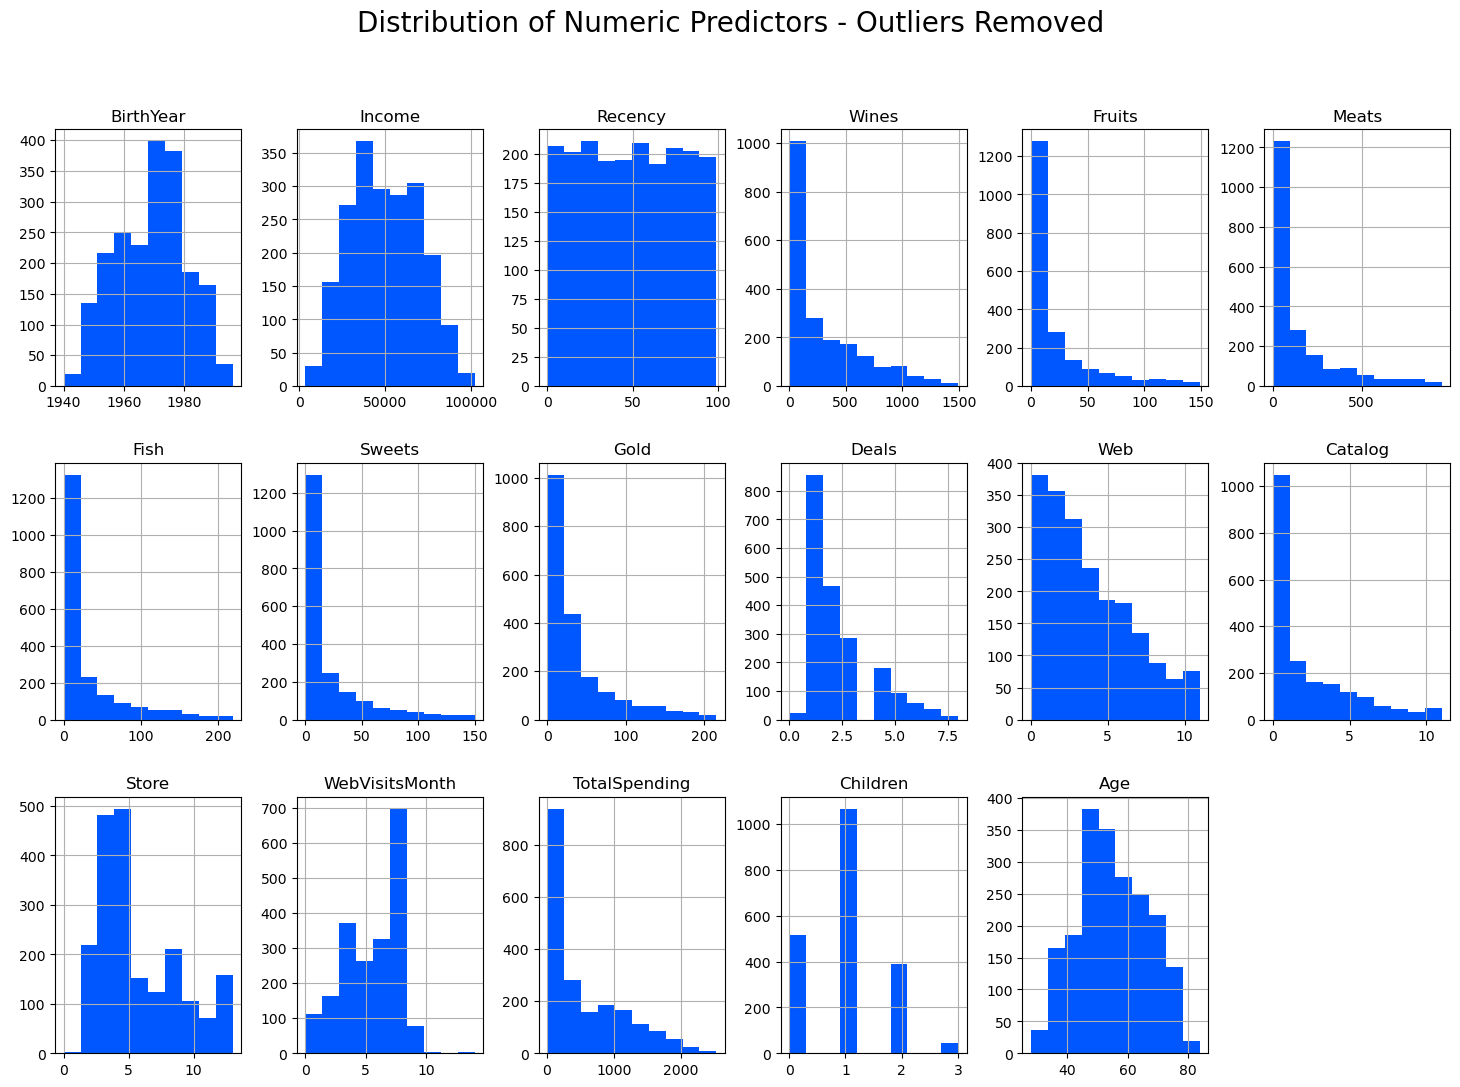

In [313]:
# Create a histogram to visualize the distributions of the numeric variables 

customer_data_outliers_removed.loc[0:, cont_columns].hist(figsize = (18,12), layout=(3,6), color = '#0056ff')
plt.suptitle("Distribution of Numeric Predictors - Outliers Removed", fontsize = 20)
#plt.figtext(x = 0.5, y = 0.05, s = "Fig. 2", fontstyle = "italic", fontweight = "demibold", fontsize = 12)
plt.show()

In [69]:
# After outliers removed

cat_stats_outliers_removed = customer_data_outliers_removed.describe(include = "object").T
cat_stats_outliers_removed["top_percent"] = (cat_stats_outliers_removed["freq"]/cat_stats_outliers_removed["count"]) * 100 
cat_stats_outliers_removed

count unique           top  freq top_percent
Education      2017      2  Postgraduate  1789   88.696083
MaritalStatus  1594      2        Couple  1311   82.245922
C3             2017      2             0  1871   92.761527
C4             2017      2             0  1867   92.563213
C5             2017      2             0  1883    93.35647
C1             2017      2             0  1911    94.74467
C2             2017      2             0  1988   98.562221
Complain       2017      2             0  1997   99.008428
C6             2017      2             0  1729   85.721368

In [71]:
customer_data_outliers_removed[customer_data_outliers_removed["Children"] == 1].shape

(1066, 33)

In [73]:
cat_stats

count unique           top  freq top_percent
Education      2240      2  Postgraduate  1983   88.526786
MaritalStatus  1760      2        Couple  1444   82.045455
DateCustomer   2240    663    31-08-2012    12    0.535714
C3             2240      2             0  2077   92.723214
C4             2240      2             0  2073   92.544643
C5             2240      2             0  2077   92.723214
C1             2240      2             0  2096   93.571429
C2             2240      2             0  2210   98.660714
Complain       2240      2             0  2219     99.0625
C6             2240      2             0  1906   85.089286

In [75]:
# Visualize the correlations between numeric data types 

corr = customer_data_outliers_removed.loc[0:, cont_columns].corr()
corr

BirthYear    Income   Recency     Wines    Fruits     Meats  \
BirthYear        1.000000 -0.235183 -0.015546 -0.178920 -0.027847 -0.059618   
Income          -0.235183  1.000000  0.010402  0.743809  0.537936  0.720771   
Recency         -0.015546  0.010402  1.000000  0.022046  0.007419  0.027169   
Wines           -0.178920  0.743809  0.022046  1.000000  0.425932  0.619253   
Fruits          -0.027847  0.537936  0.007419  0.425932  1.000000  0.605866   
Meats           -0.059618  0.720771  0.027169  0.619253  0.605866  1.000000   
Fish            -0.065063  0.550665 -0.010437  0.419285  0.580376  0.621500   
Sweets          -0.018496  0.557477  0.007069  0.422478  0.614759  0.583884   
Gold            -0.070799  0.433507  0.029001  0.428761  0.412643  0.414697   
Deals           -0.079517 -0.101156  0.028635  0.016180 -0.097551 -0.189147   
Web             -0.177538  0.545465  0.012050  0.599866  0.359783  0.377780   
Catalog         -0.161713  0.731275  0.032278  0.712043  0.526239  0.720987   
Store           -0.151467  0.699395 -0.001148  0.656398  0.506613  0.551704   
WebVisitsMonth   0.142975 -0.641022 -0.013802 -0.344293 -0.426388 -0.552604   
TotalSpending   -0.139140  0.825767  0.024699  0.916722  0.627441  0.859398   
Children        -0.093935 -0.316029  0.023925 -0.361154 -0.376413 -0.505091   
Age             -1.000000  0.235183  0.015546  0.178920  0.027847  0.059618   

                    Fish    Sweets      Gold     Deals       Web   Catalog  \
BirthYear      -0.065063 -0.018496 -0.070799 -0.079517 -0.177538 -0.161713   
Income          0.550665  0.557477  0.433507 -0.101156  0.545465  0.731275   
Recency        -0.010437  0.007069  0.029001  0.028635  0.012050  0.032278   
Wines           0.419285  0.422478  0.428761  0.016180  0.599866  0.712043   
Fruits          0.580376  0.614759  0.412643 -0.097551  0.359783  0.526239   
Meats           0.621500  0.583884  0.414697 -0.189147  0.377780  0.720987   
Fish            1.000000  0.616530  0.411757 -0.137051  0.336387  0.586187   
Sweets          0.616530  1.000000  0.365147 -0.110983  0.353384  0.563062   
Gold            0.411757  0.365147  1.000000  0.113891  0.436333  0.488490   
Deals          -0.137051 -0.110983  0.113891  1.000000  0.326614 -0.061966   
Web             0.336387  0.353384  0.436333  0.326614  1.000000  0.494059   
Catalog         0.586187  0.563062  0.488490 -0.061966  0.494059  1.000000   
Store           0.476595  0.509103  0.418108  0.081824  0.568388  0.597284   
WebVisitsMonth -0.457936 -0.438601 -0.221882  0.335063 -0.032836 -0.526006   
TotalSpending   0.639317  0.617333  0.549756 -0.069794  0.583883  0.813938   
Children       -0.425002 -0.390876 -0.260054  0.443567 -0.176369 -0.447041   
Age             0.065063  0.018496  0.070799  0.079517  0.177538  0.161713   

                   Store  WebVisitsMonth  TotalSpending  Children       Age  
BirthYear      -0.151467        0.142975      -0.139140 -0.093935 -1.000000  
Income          0.699395       -0.641022       0.825767 -0.316029  0.235183  
Recency        -0.001148       -0.013802       0.024699  0.023925  0.015546  
Wines           0.656398       -0.344293       0.916722 -0.361154  0.178920  
Fruits          0.506613       -0.426388       0.627441 -0.376413  0.027847  
Meats           0.551704       -0.552604       0.859398 -0.505091  0.059618  
Fish            0.476595       -0.457936       0.639317 -0.425002  0.065063  
Sweets          0.509103       -0.438601       0.617333 -0.390876  0.018496  
Gold            0.418108       -0.221882       0.549756 -0.260054  0.070799  
Deals           0.081824        0.335063      -0.069794  0.443567  0.079517  
Web             0.568388       -0.032836       0.583883 -0.176369  0.177538  
Catalog         0.597284       -0.526006       0.813938 -0.447041  0.161713  
Store           1.000000       -0.469523       0.703927 -0.340365  0.151467  
WebVisitsMonth -0.469523        1.000000      -0.495820  0.397080 -0.142975  
TotalSpending   0.

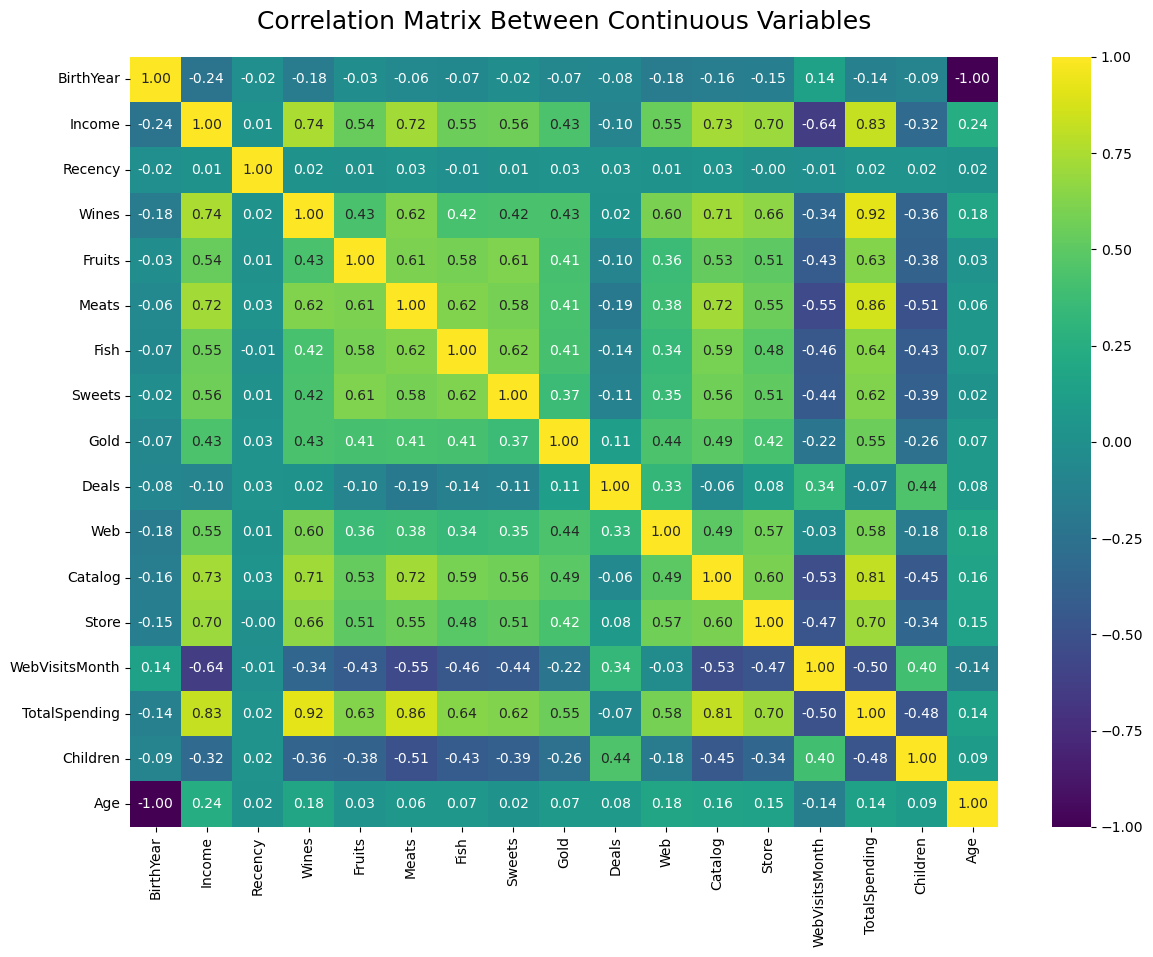

In [77]:
# Create heatmap to visualize the correlation strength bewteen numeric variables 
plt.figure(figsize = (14,10))
sns.heatmap(corr, vmin=-1, vmax= 1, annot = True, fmt='.2f', annot_kws={'size': 10}, center = 0, cmap="viridis")
plt.title("Correlation Matrix Between Continuous Variables", pad = 20, fontsize = 18)
#plt.figtext(x = 0, y = -0.1, s = "Fig. 3", fontstyle = "italic", fontweight = "demibold", fontsize = 12)
plt.show()

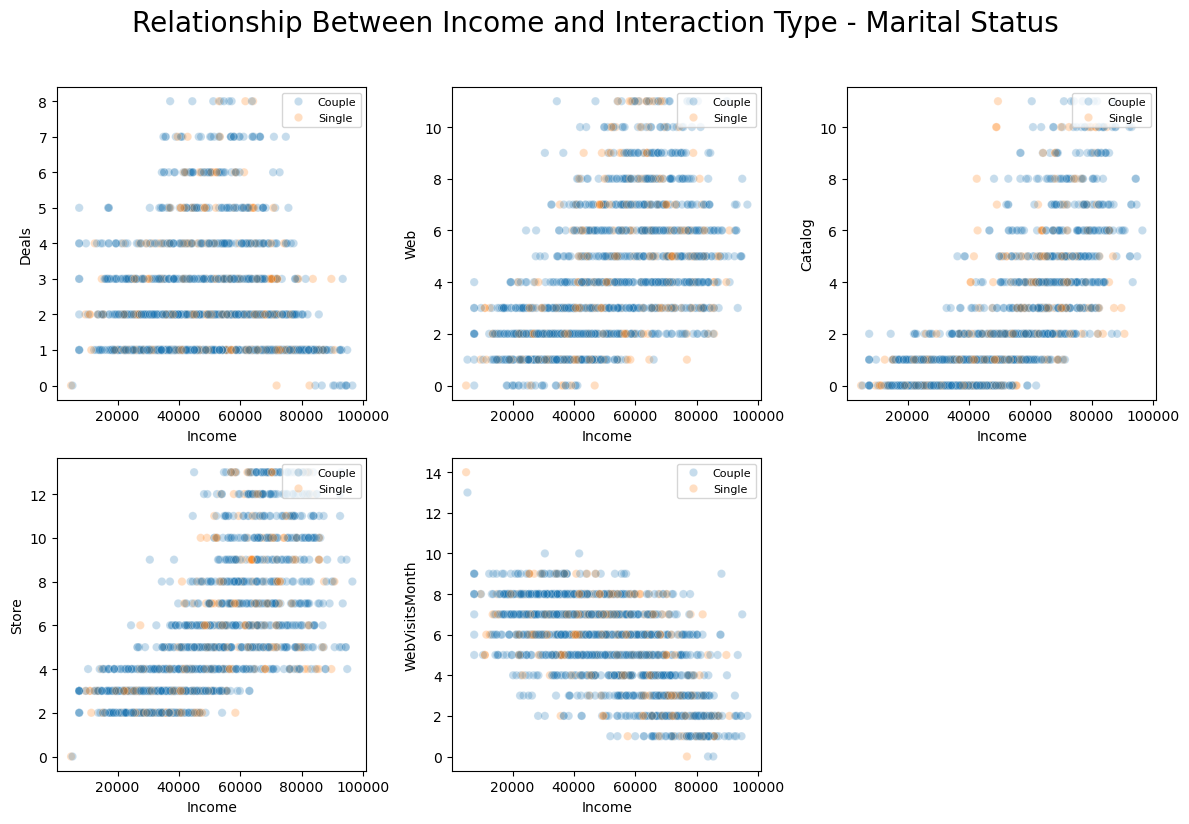

In [282]:
# Visualize the relationship between income and type of interaction (Deals, Web, Catalog, Stores)
# Add Marital Status to visualize any obvious patterns

interactions = ["Deals", "Web", "Catalog", "Store", "WebVisitsMonth"]

# Create plot
plt.figure(figsize = (12,8))

for i in range(len(interactions)):
    plt.subplot(2,3,i+1)
    sns.scatterplot(data = customer_data_outliers_removed,
                    x = "Income",
                    y = interactions[i],
                    hue = "MaritalStatus", 
                   alpha = 0.25)
    plt.legend(fontsize = 8, loc = 'upper right')

plt.suptitle("Relationship Between Income and Interaction Type - Marital Status", y = 1.025,
            fontsize = 20)
#plt.figtext(x = 0.5, y = -0.03, s = "Fig. 4", fontstyle = "italic", fontweight = "demibold", fontsize = 12)
plt.tight_layout()

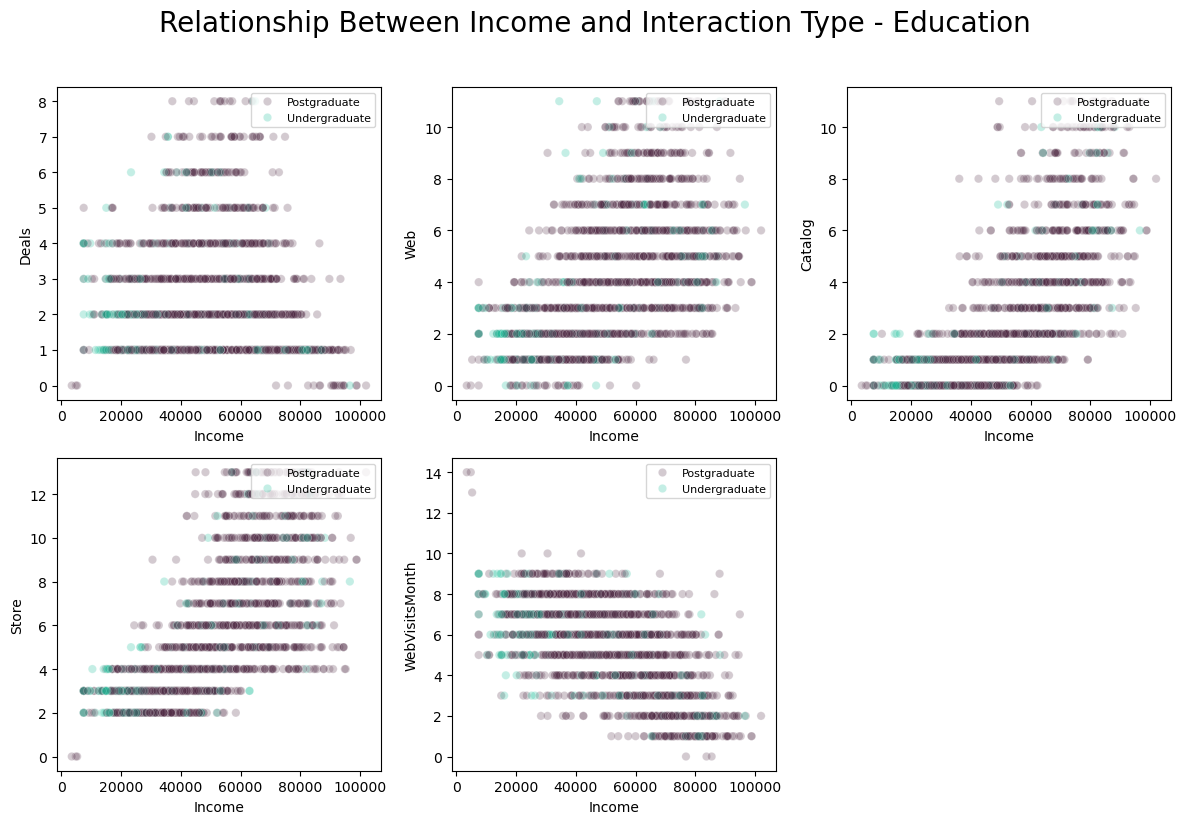

In [280]:
# Visualize the relationship between income and type of interaction (Deals, Web, Catalog, Stores)
# Add Education to visualize any obvious patterns

interactions = ["Deals", "Web", "Catalog", "Store", "WebVisitsMonth"]

# Create plot
plt.figure(figsize = (12,8))

for i in range(len(interactions)):
    plt.subplot(2,3,i+1)
    sns.scatterplot(data = customer_data_outliers_removed,
                    x = "Income",
                    y = interactions[i],
                    hue = "Education",
                   palette=["#522d47","#17be98"], 
                   alpha = 0.25)
    plt.legend(fontsize = 8, loc = 'upper right')

plt.suptitle("Relationship Between Income and Interaction Type - Education", y = 1.025,
            fontsize = 20)
#plt.figtext(x = 0.5, y = -0.03, s = "Fig. 5", fontstyle = "italic", fontweight = "demibold", fontsize = 12)
plt.tight_layout()

In [79]:
# Visualize scatter plots with pairs plot - uncomment to run
# sns.pairplot(data = customer_data[cont_columns])

## Build KMeans model

- Compare models with and without outliers removed 
- Models only using continuous variables 

### KMeans with outliers removed

In [83]:
model_df = customer_data_outliers_removed.copy()
model_df = model_df[cont_columns]
model_df.drop(columns= ["BirthYear"], inplace = True)
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2017 entries, 0 to 2235
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Income          2017 non-null   float64
 1   Recency         2017 non-null   int64  
 2   Wines           2017 non-null   int64  
 3   Fruits          2017 non-null   int64  
 4   Meats           2017 non-null   int64  
 5   Fish            2017 non-null   int64  
 6   Sweets          2017 non-null   int64  
 7   Gold            2017 non-null   int64  
 8   Deals           2017 non-null   int64  
 9   Web             2017 non-null   int64  
 10  Catalog         2017 non-null   int64  
 11  Store           2017 non-null   int64  
 12  WebVisitsMonth  2017 non-null   int64  
 13  TotalSpending   2017 non-null   int64  
 14  Children        2017 non-null   int64  
 15  Age             2017 non-null   int64  
dtypes: float64(1), int64(15)
memory usage: 332.4 KB


In [85]:
# Inspect the missing values in Income column 

model_df[model_df["Income"].isna()]

Empty DataFrame
Columns: [Income, Recency, Wines, Fruits, Meats, Fish, Sweets, Gold, Deals, Web, Catalog, Store, WebVisitsMonth, TotalSpending, Children, Age]
Index: []

In [87]:
# Uncomment to install fancyimpute when handling missing values 

# !pip install fancyimpute

### Standardize the data

In [90]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(model_df)

In [92]:
scaled_data

array([[ 0.40601709,  0.30510044,  1.02309966, ...,  1.8629626 ,
        -1.33912879,  1.02876573],
       [-0.18217176, -0.38720194, -0.8249091 , ..., -0.90423155,
         1.37956549,  1.28619115],
       [ 1.07804055, -0.80258337,  0.40413519, ...,  0.39930833,
        -1.33912879,  0.34229795],
       ...,
       [ 0.34831533,  1.44739937,  1.83160349, ...,  1.20858209,
        -1.33912879, -1.0306376 ],
       [ 0.95994396, -1.42565552,  0.41005829, ...,  0.51591337,
         0.02021835,  1.1145742 ],
       [ 0.1432422 , -0.3179717 , -0.60871577, ..., -0.65187737,
         1.37956549,  1.28619115]])

### Handle missing data

In [95]:
# from fancyimpute import KNN, IterativeImputer
# Impute missing values using KNN for the Income variable
# scaled_data = KNN(k=3).fit_transform(scaled_data)

### Silhouette score to find K 

In [98]:
# Cluster the data with KMeans - find the best K-clusters using the silohuette score

K = range(2, 8)
fits = []
score = []


for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(scaled_data)
    
    # append the model to fits
    fits.append(model)
    
    # Append the silhouette score to scores
    score.append(silhouette_score(scaled_data, model.labels_, metric='euclidean'))

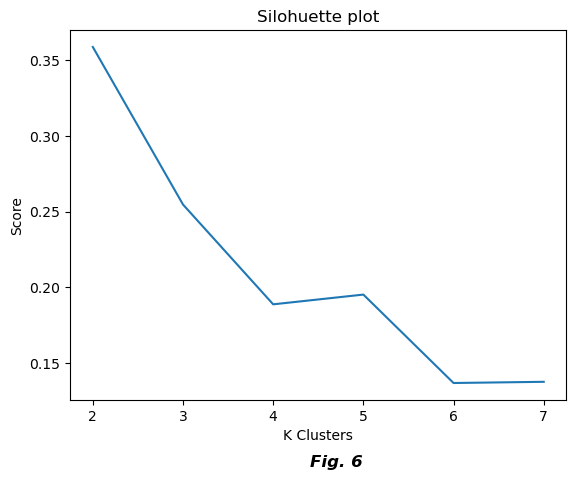

In [100]:
sns.lineplot(x = K, y = score)
plt.title("Silohuette plot")
plt.ylabel("Score")
plt.xlabel("K Clusters")
plt.figtext(x = 0.5, y = -0.03, s = "Fig. 6", fontstyle = "italic", fontweight = "demibold", fontsize = 12)
plt.show()

### Fit Kmeans model

In [103]:
# Re fit the model using k-clusters = 2 
kmeans = KMeans(n_clusters = 2, random_state = 123, n_init='auto')
kmeans.fit(scaled_data)

KMeans(n_clusters=2, n_init='auto', random_state=123)

In [105]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [107]:
metrics.silhouette_score(scaled_data, labels, metric = "euclidean")

0.3582906791131877

### Size of clusters 

In [110]:
label_series = pd.Series(labels).astype("object")
label_series.value_counts()/len(label_series)

0    0.636589
1    0.363411
Name: count, dtype: float64

### Visualizations

#### Frequency Counts

In [293]:
def frequency_count(df, cluster_labels):

    plt.figure(figsize = (14,10))

    for i in range(len(cat_columns)):
        plt.subplot(3,3,i+1)
        sns.countplot(data = df,
                  x = cat_columns[i],
                  stat = "proportion", 
                  hue = cluster_labels,
                  palette = ['#0056ff', '#ffed4a'])
        plt.xticks(rotation = 0)

    plt.suptitle("Between Group Frequency Count", y = 1.025,
            fontsize = 20)
    #plt.figtext(x = 0.5, y = -0.03, s = "Fig. 1", fontstyle = "italic", fontweight = "demibold", fontsize = 12)
    plt.tight_layout(pad = 2.5)

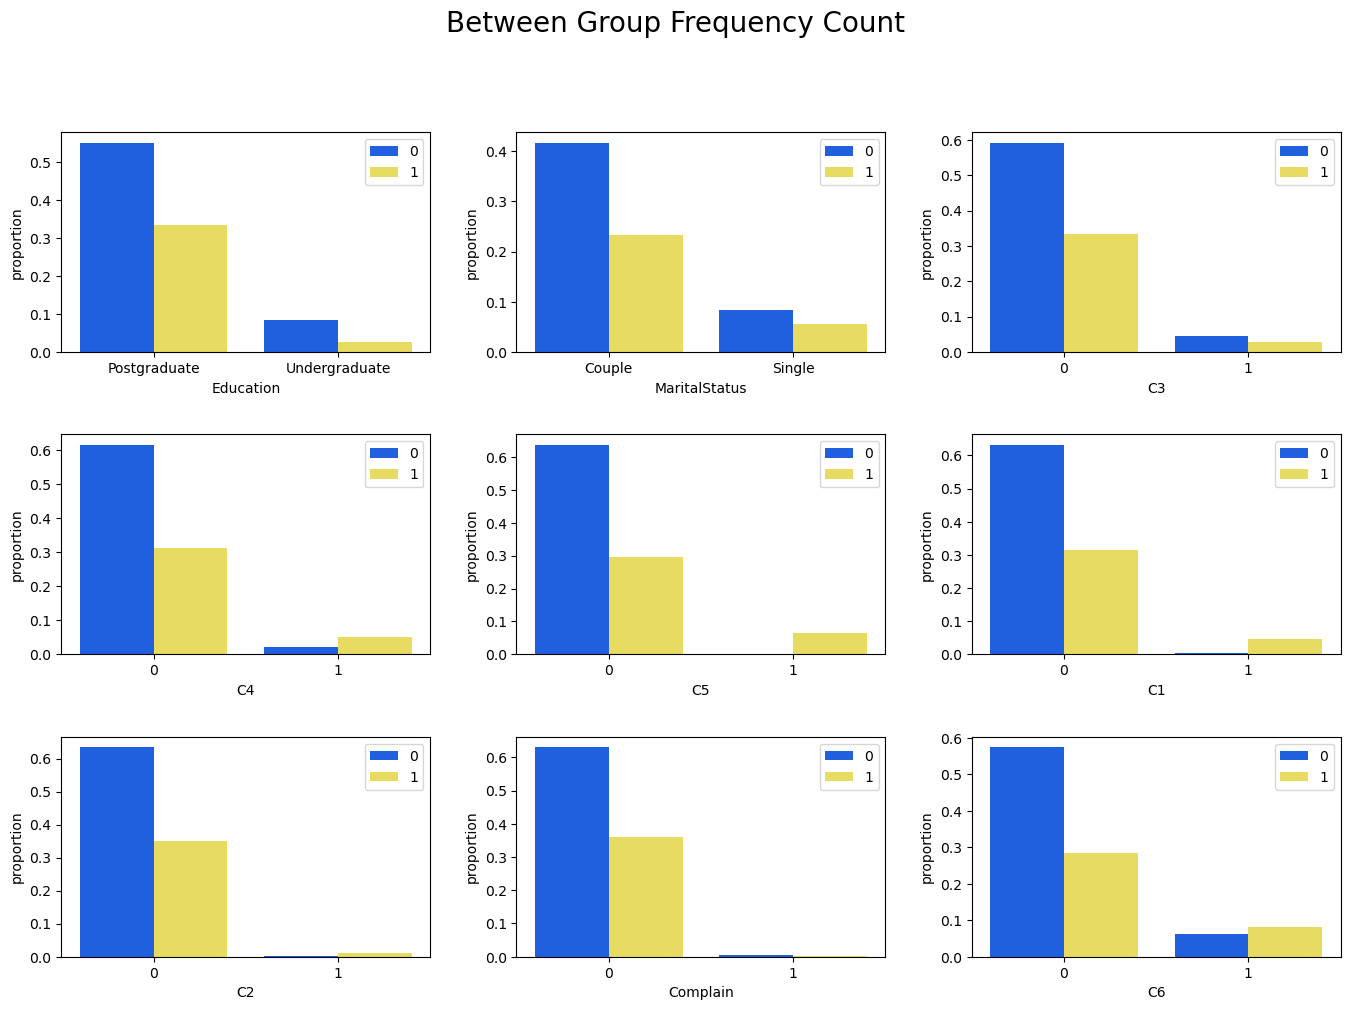

In [295]:
frequency_count(customer_data_outliers_removed, labels)

#### Distribution of continuous variables

In [119]:
# Create plot
def dist_plot(df, df_cols, cluster_labels):
    
    plt.figure(figsize = (13,10))
    
    cols = df_cols.columns
    
    for i in range(len(cols)):
        plt.subplot(4,4,i+1)
        sns.boxplot(data = df,
                    x = cluster_labels,
                    y = cols[i],
                    hue = cluster_labels,
                    palette = ['#0056ff', '#ffed4a'])
        plt.legend(fontsize = 8, loc = 'upper right')

    plt.suptitle("Distribution Between Clusters", y = 1.025,
            fontsize = 20)
    #plt.figtext(x = 0.5, y = -0.03, s = "Fig. 9", fontstyle = "italic", fontweight = "demibold", fontsize = 12)
    plt.tight_layout()

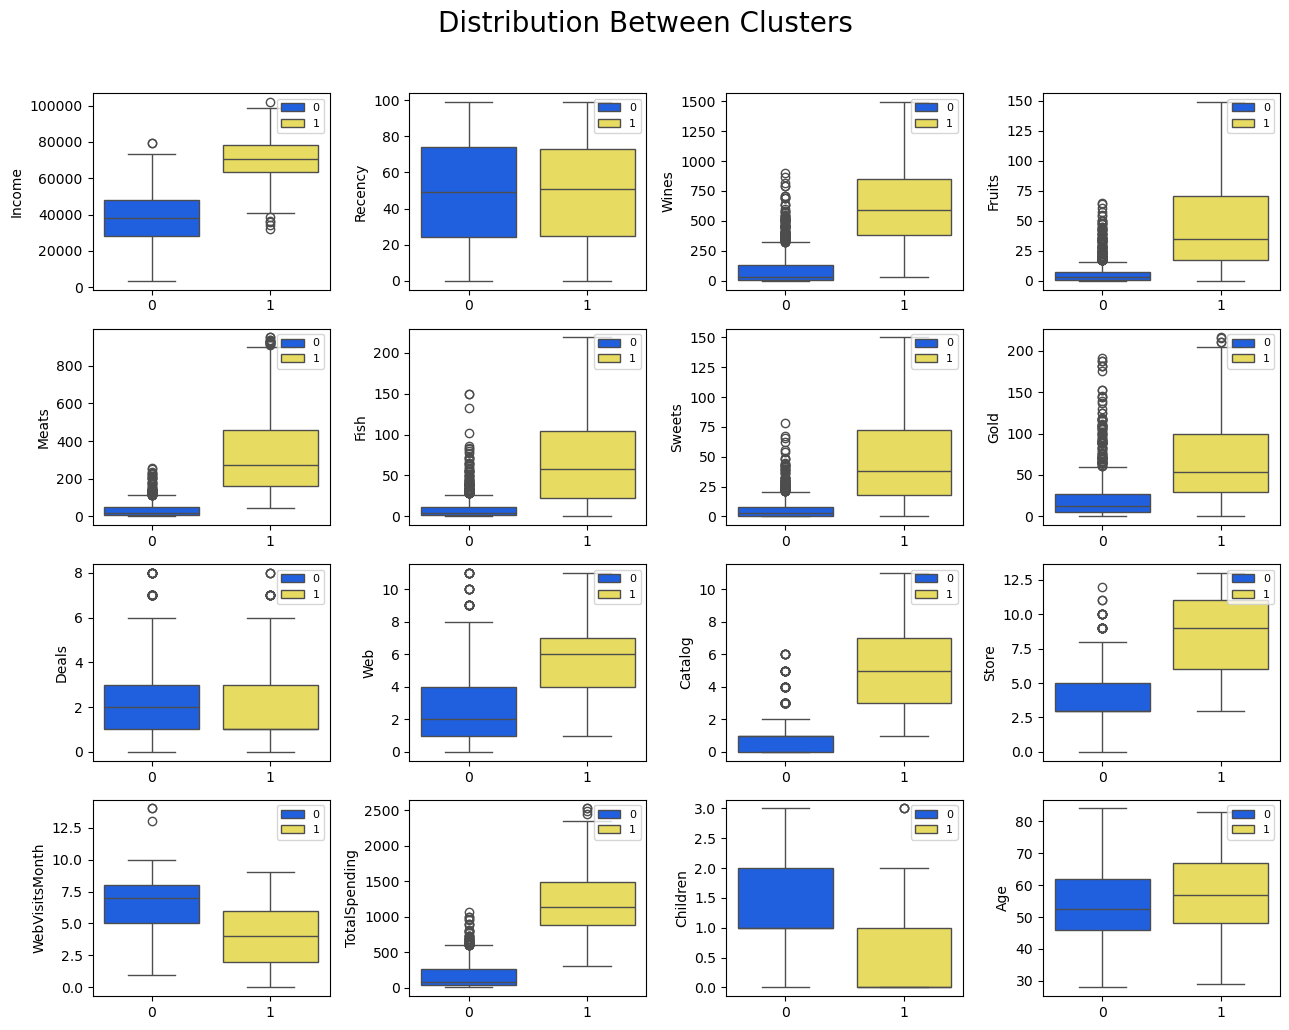

In [121]:
dist_plot(model_df, model_df, labels)

#### Interaction vs. Income

In [124]:
# Replot above scatter plots - relationship between income and type of interaction (Deals, Web, Catalog, Stores)
# Add new groups to hue parameter

def interactions_income(df, cluster_labels):
    
    interactions = ["Deals", "Web", "Catalog", 
                    "Store", "WebVisitsMonth"]

    # Create plot
    plt.figure(figsize = (13,10))

    for i in range(len(interactions)):
        plt.subplot(2,3,i+1)
        sns.scatterplot(data = df,
                    x = "Income",
                    y = interactions[i],
                    hue = cluster_labels,
                    palette = ['#0056ff', '#ffed4a'],
                    alpha = 0.4)
        plt.legend(fontsize = 8, loc = 'upper right')

    plt.suptitle("Relationship Between Income and Interaction Type", y = 1.025,
            fontsize = 14)
    #plt.figtext(x = 0.5, y = -0.03, s = "Fig. 7", fontstyle = "italic", fontweight = "demibold", fontsize = 12)
    plt.tight_layout()

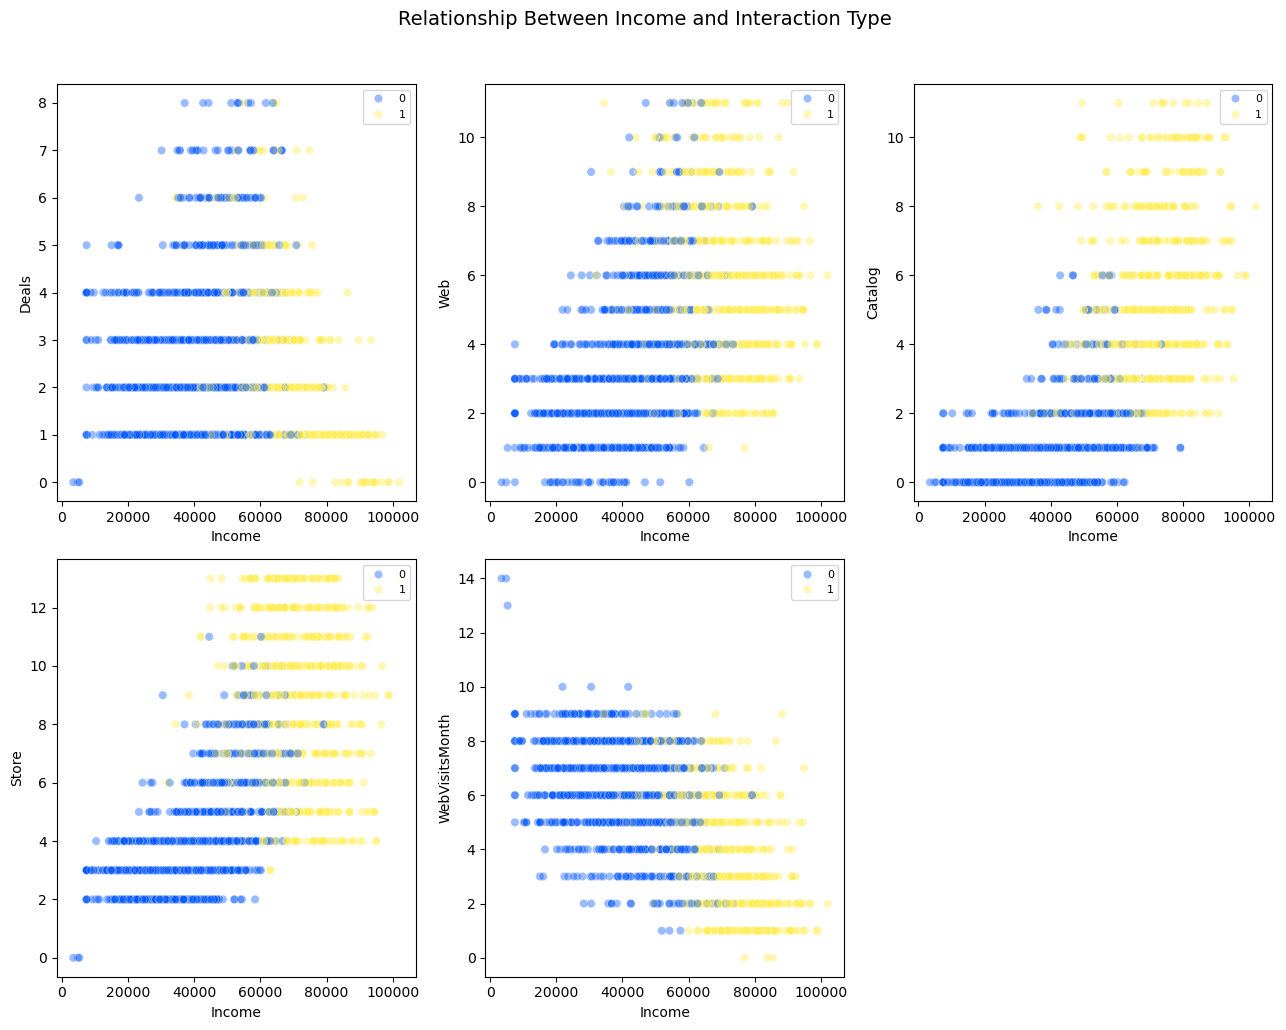

In [126]:
interactions_income(model_df, labels)

#### Prodcut vs. Income

In [129]:
# Visualize the relationship between income and type of item purchased (Deals, Web, Catalog, Stores)
# Add Education to visualize any obvious patterns

def product_income(df, cluster_labels):

    products = ["Wines", "Fruits", "Meats", "Fish", 
                "Sweets", "Gold", "TotalSpending"]

    # Create plot
    plt.figure(figsize = (14,8))

    for i in range(len(products)):
        plt.subplot(2,4,i+1)
        sns.scatterplot(data = df,
                    x = "Income",
                    y = products[i],
                    hue = cluster_labels,
                    palette = ['#0056ff', '#ffed4a'],
                    alpha = 0.4)
        plt.legend(fontsize = 8, loc = 'upper right')

    plt.suptitle("Relationship Between Income and Product Type", y = 1.025,
                fontsize = 14)
    #plt.figtext(x = 0.5, y = -0.03, s = "Fig. 8", fontstyle = "italic", fontweight = "demibold", fontsize = 12)
    plt.tight_layout()

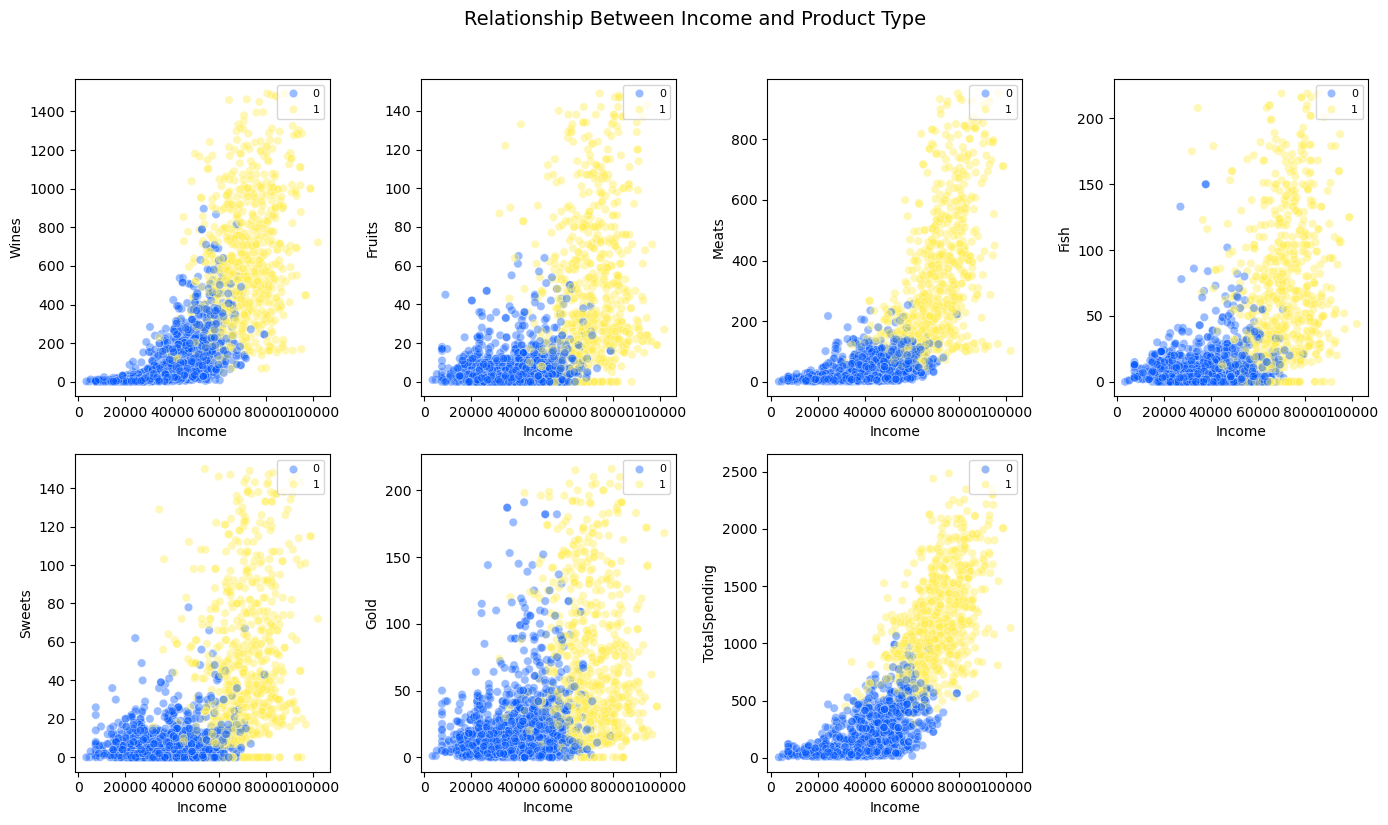

In [131]:
product_income(model_df, labels)

### KMeans without removing outliers

In [133]:
model2_df = customer_data.copy()
model2_df = model2_df[cont_columns]
model2_df.drop(columns= ["BirthYear"], inplace = True)
# Remove income outliers 
model2_df = model2_df[model2_df["Income"] < upper_dict["Income"]]

print(f"Data Size when only Income outliers removed:",  {model2_df.shape})

scaler2 = StandardScaler()
scaled_data2 = scaler2.fit_transform(model2_df)

from fancyimpute import KNN, IterativeImputer

# Impute missing values using KNN for the Income variable

scaled_data2 = KNN(k=3).fit_transform(scaled_data2)


# Cluster the data with KMeans - find the best K-clusters using the silohuette score

K = range(2, 8)
fits = []
score = []


for k in K:
    # train the model for current value of k on training data
    model2 = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(scaled_data2)
    
    # append the model to fits
    fits.append(model2)
    
    # Append the silhouette score to scores
    score.append(silhouette_score(scaled_data2, model2.labels_, metric='euclidean'))

Data Size when only Income outliers removed: {(2205, 16)}


/Applications/anaconda3/lib/python3.9/site-packages/fancyimpute/solver.py:55: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")


Imputing row 1/2205 with 0 missing, elapsed time: 0.498
Imputing row 101/2205 with 0 missing, elapsed time: 0.498
Imputing row 201/2205 with 0 missing, elapsed time: 0.498
Imputing row 301/2205 with 0 missing, elapsed time: 0.498
Imputing row 401/2205 with 0 missing, elapsed time: 0.498
Imputing row 501/2205 with 0 missing, elapsed time: 0.499
Imputing row 601/2205 with 0 missing, elapsed time: 0.499
Imputing row 701/2205 with 0 missing, elapsed time: 0.499
Imputing row 801/2205 with 0 missing, elapsed time: 0.499
Imputing row 901/2205 with 0 missing, elapsed time: 0.499
Imputing row 1001/2205 with 0 missing, elapsed time: 0.499
Imputing row 1101/2205 with 0 missing, elapsed time: 0.499
Imputing row 1201/2205 with 0 missing, elapsed time: 0.500
Imputing row 1301/2205 with 0 missing, elapsed time: 0.500
Imputing row 1401/2205 with 0 missing, elapsed time: 0.500
Imputing row 1501/2205 with 0 missing, elapsed time: 0.500
Imputing row 1601/2205 with 0 missing, elapsed time: 0.500
Imputing 

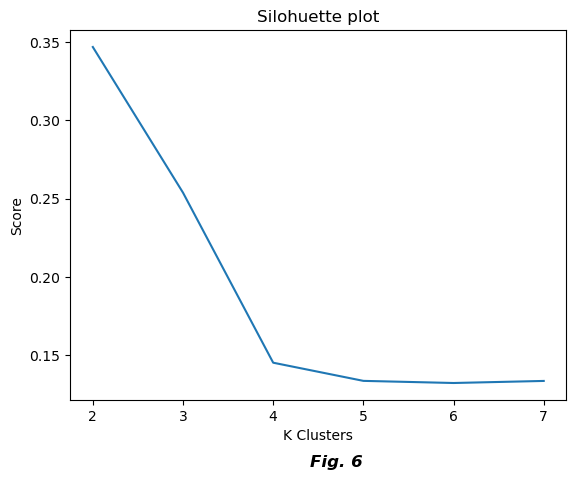

In [134]:
sns.lineplot(x = K, y = score)
plt.title("Silohuette plot")
plt.ylabel("Score")
plt.xlabel("K Clusters")
plt.figtext(x = 0.5, y = -0.03, s = "Fig. 6", fontstyle = "italic", fontweight = "demibold", fontsize = 12)
plt.show()

## Build KMeans using PCA

Create a model by reducing dimensions to improve clustering. 

In [137]:
# Import PCA

from sklearn.decomposition import PCA

In [139]:
# Using the same data set above --> KMeans_model_df

# Scale the data and impute missing values --> KMeans_scaled

### Fit PCA model 

In [286]:
pca = PCA()
pca.fit(scaled_data)

PCA()

### Visualize the explained variance 

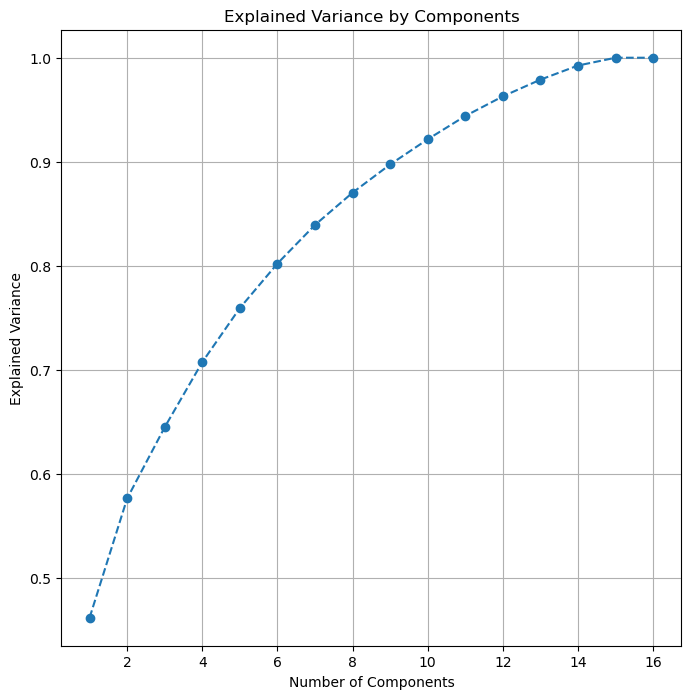

In [289]:
# Select the number of features we would like to keep based on the variance each component 
plt.figure(figsize = (8,8))

plt.plot(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_.cumsum(), 
              marker = "o", linestyle = "--")
plt.grid(True)
plt.title("Explained Variance by Components")
plt.ylabel("Explained Variance")
plt.xlabel("Number of Components")
#plt.axhline(y=0.815, color='red', linestyle = "-.")
#plt.axvline(x=8, color='red', linestyle = "-.")
plt.show()

### Re-fit PCA

In [145]:
# Re-fit PCA with the desired number of components - 6 components

pca = PCA(n_components=6)

pca.fit(scaled_data)

PCA(n_components=6)

### Get loading scores

In [147]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2','PC3','PC4',
                                                   'PC5','PC6'], index = model_df.columns)
loadings.sort_values(['PC1'], ascending = False)

PC1       PC2       PC3       PC4       PC5       PC6
TotalSpending   0.350380  0.059649  0.004280 -0.003869 -0.187026 -0.035033
Income          0.320868  0.052675 -0.224422  0.035255 -0.037414 -0.237537
Catalog         0.315254  0.025162 -0.058232 -0.017984 -0.099672  0.008434
Meats           0.312931 -0.122975  0.010937 -0.035937 -0.045397 -0.076811
Wines           0.296260  0.184988 -0.085675  0.027627 -0.423962 -0.106207
Store           0.285526  0.153865 -0.037769  0.052669 -0.035056 -0.258227
Fish            0.269708 -0.125411  0.134574  0.000257  0.362937  0.146973
Sweets          0.265895 -0.104999  0.183414 -0.026520  0.399990 -0.076067
Fruits          0.264330 -0.083246  0.199864 -0.031316  0.395809  0.009615
Web             0.220617  0.435563  0.141816  0.045443 -0.176307  0.074049
Gold            0.216008  0.178912  0.248403 -0.056388  0.080916  0.592844
Age             0.060325  0.228910 -0.756721  0.103443  0.223113  0.470180
Recency         0.007035  0.047246 -0.108637 -0.987737 -0.032075  0.006579
Deals          -0.041477  0.615234  0.182395 -0.012943  0.241893 -0.193155
Children       -0.202286  0.367712 -0.160275 -0.012042  0.373144 -0.373603
WebVisitsMonth -0.229562  0.310245  0.347049  0.004854 -0.189960  0.275661

### Calculate resulting components scores

In [149]:
# calculated resulting components scores for the elements in our data set

pca_scores = pca.transform(scaled_data)

In [151]:
pca_scores

array([[ 5.18905122e+00,  4.00938575e-01,  1.16629896e+00,
        -4.11407037e-01,  1.20572653e+00,  1.90603013e+00],
       [-2.40189829e+00, -1.24094681e-01, -1.75301411e+00,
         4.75514753e-01,  8.59469155e-01,  1.93883970e-03],
       [ 2.46179104e+00, -3.86448641e-01,  1.04350052e-02,
         1.01527785e+00, -4.37776856e-02,  4.01082476e-01],
       ...,
       [ 2.03843190e+00, -7.62036580e-01,  3.87806998e-01,
        -1.38130486e+00, -1.80497466e+00, -9.07167553e-01],
       [ 2.45408254e+00,  3.38787471e-01, -9.66258721e-01,
         1.59635321e+00,  5.29768695e-01,  7.11282950e-02],
       [-1.85405736e+00,  1.06844745e+00, -1.24134037e+00,
         4.56798169e-01,  5.72717730e-01,  9.01252415e-02]])

### Build KMeans Model with PCA data

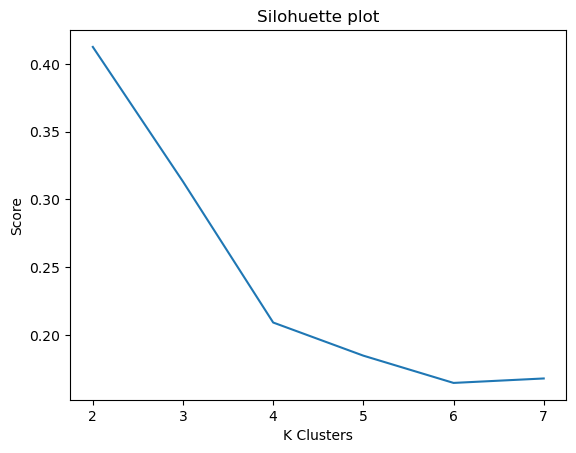

In [291]:
# Cluster the data with KMeans - find the best K-clusters using the silohuette score

K = range(2, 8)
fits = []
score = []


for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(pca_scores)
    
    # append the model to fits
    fits.append(model)
    
    # Append the silhouette score to scores
    score.append(silhouette_score(pca_scores, model.labels_, metric='euclidean'))

# Plot the silohuette curve 

sns.lineplot(x = K, y = score)
plt.title("Silohuette plot")
plt.ylabel("Score")
plt.xlabel("K Clusters")
#plt.figtext(x = 0.5, y = -0.03, s = "Fig. 6", fontstyle = "italic", fontweight = "demibold", fontsize = 12)
plt.show()

In [156]:
# Fit the model with the best value for K

kmeans_pca = KMeans(n_clusters=2, random_state=123)
kmeans_pca.fit(pca_scores)

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=123)

In [158]:
# Silhouette score using 2 clusters

metrics.silhouette_score(pca_scores, labels, metric = "euclidean")

0.41204237830574086

In [244]:
# Combine data set with component scores

kmeans_with_pca_df = pd.concat([customer_data_outliers_removed.reset_index(drop = True), pd.DataFrame(pca_scores)], axis = 1)

kmeans_with_pca_df.columns.values[-6:] = ["PC1","PC2","PC3","PC4","PC5","PC6"]

kmeans_with_pca_df["Cluster_label_PCA"] = kmeans_pca.labels_

kmeans_with_pca_df.head()

ID  BirthYear     Education MaritalStatus   Income  KidHome  TeenHome  \
0  5524       1957  Postgraduate           NaN  58138.0        0         0   
1  2174       1954  Postgraduate           NaN  46344.0        1         1   
2  4141       1965  Postgraduate        Couple  71613.0        0         0   
3  6182       1984  Postgraduate        Couple  26646.0        1         0   
4  5324       1981  Postgraduate        Couple  58293.0        1         0   

  DateCustomer  Recency  Wines  ...  Children  Age  Company_yrs       PC1  \
0   2012-09-04       58    635  ...         0   67           12  5.189051   
1   2014-03-08       38     11  ...         2   70           10 -2.401898   
2   2013-08-21       26    426  ...         0   59           11  2.461791   
3   2014-02-10       26     11  ...         1   40           10 -2.436344   
4   2014-01-19       94    173  ...         1   43           10  0.236481   

        PC2       PC3       PC4       PC5       PC6  Cluster_label_PCA  
0  0.400939  1.166299 -0.411407  1.205727  1.906030                  1  
1 -0.124095 -1.753014  0.475515  0.859469  0.001939                  0  
2 -0.386449  0.010435  1.015278 -0.043778  0.401082                  1  
3 -0.939361  0.936867  0.654476 -0.193627 -0.480863                  0  
4  0.789400  0.917717 -1.629137  0.702692 -1.183367                  0  

[5 rows x 40 columns]

### Visualizations

#### Frequency of labels

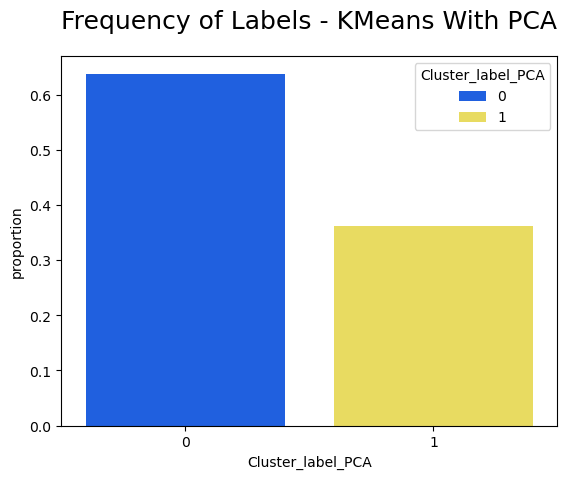

In [299]:
sns.countplot(data = kmeans_with_pca_df, x = "Cluster_label_PCA", 
              hue = "Cluster_label_PCA", palette=['#0056ff', '#ffed4a'],
             stat = "proportion")
plt.title("Frequency of Labels - KMeans With PCA", size = 18, pad = 20)
plt.show()

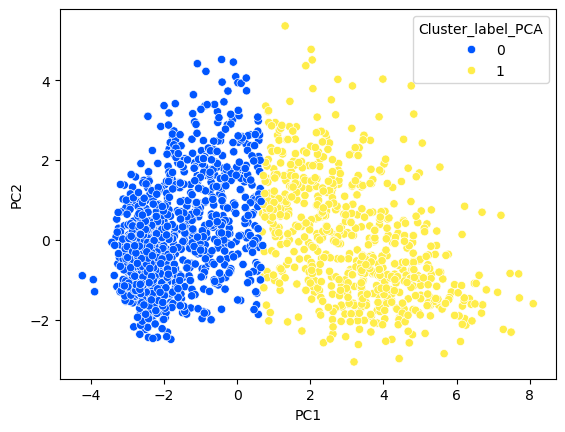

In [250]:
# plot the first two components

sns.scatterplot(data = kmeans_with_pca_df, x = "PC1", y = "PC2", 
                hue = "Cluster_label_PCA",
               palette=['#0056ff', '#ffed4a'])
plt.show()

#### Categorical Featutres

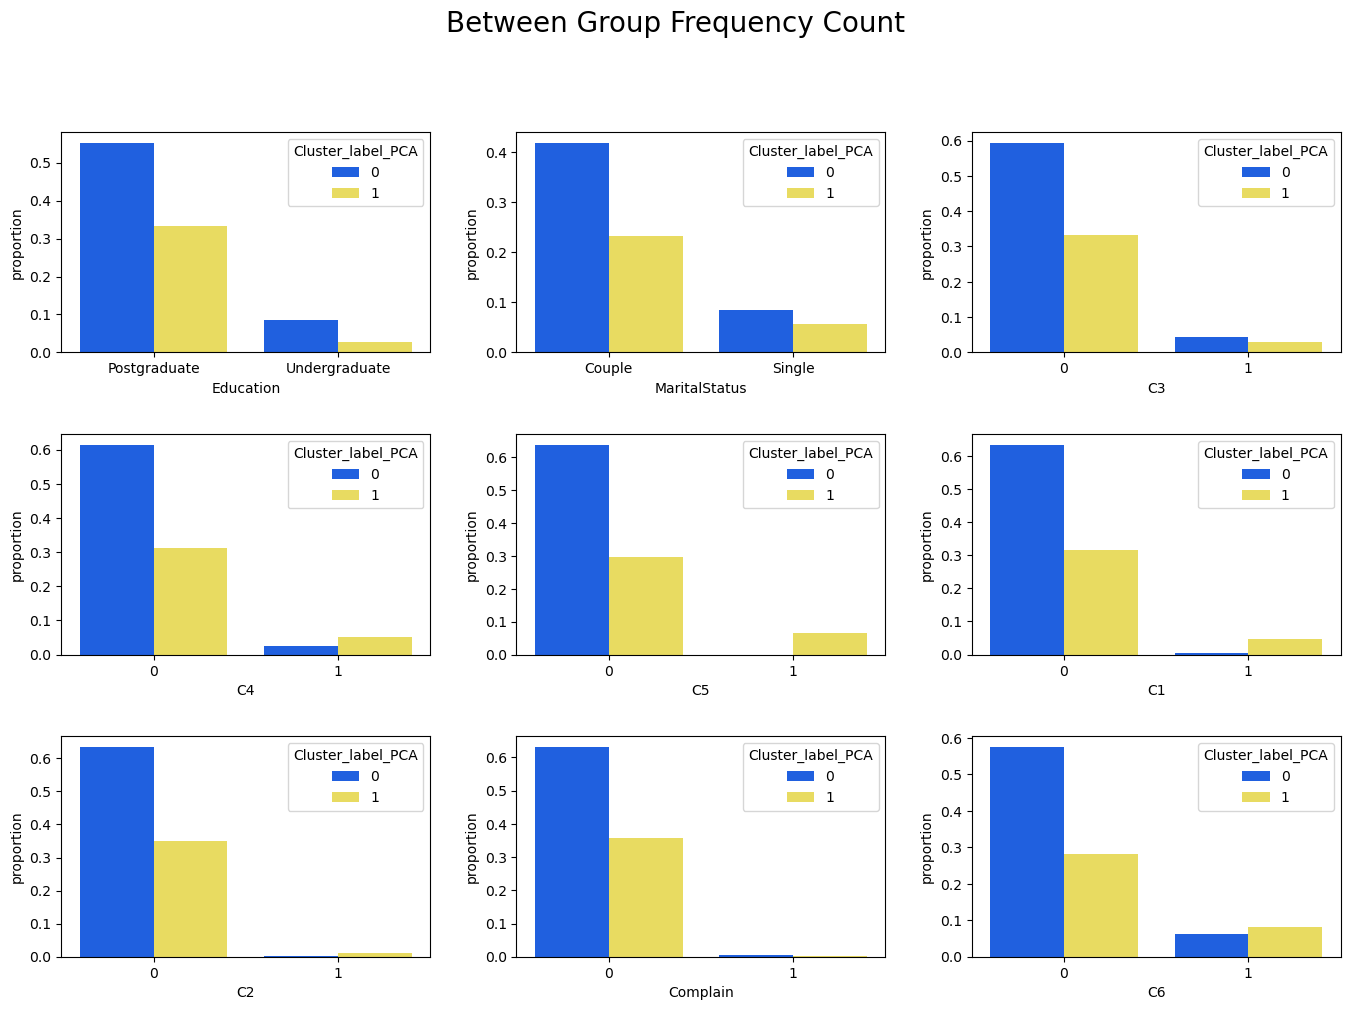

In [297]:
frequency_count(kmeans_with_pca_df, "Cluster_label_PCA")

#### Distrubutions

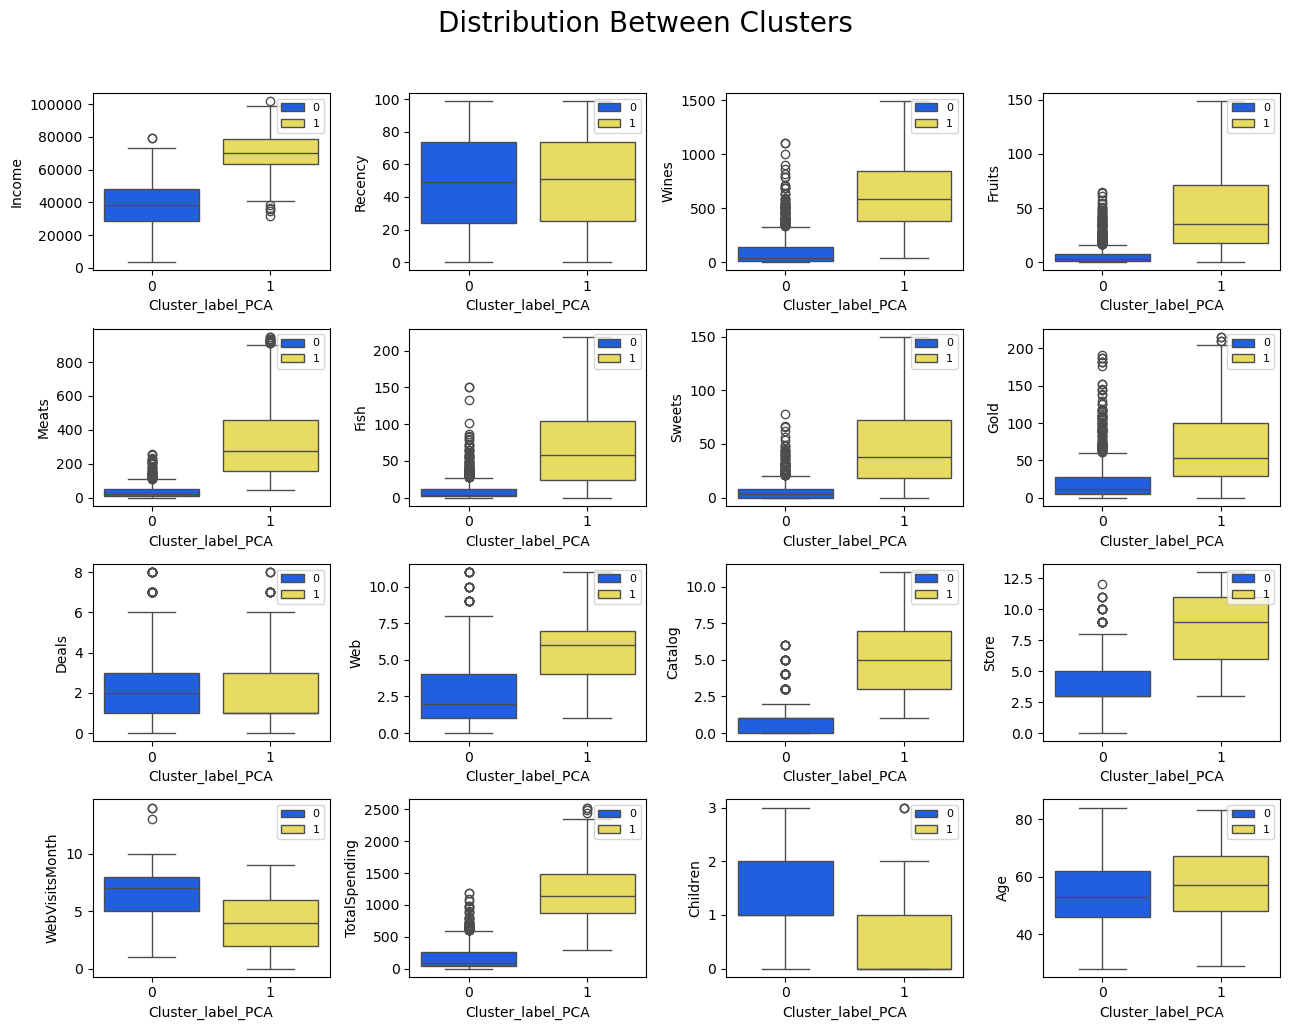

In [254]:
dist_plot(kmeans_with_pca_df, model_df, "Cluster_label_PCA")

#### Between group descriptive stats

In [329]:
kmeans_with_pca_df.groupby("Cluster_label_PCA")["Income"].describe()

count          mean           std      min       25%  \
Cluster_label_PCA                                                          
0                  1287.0  38379.000777  13606.255678   3502.0  28423.50   
1                   730.0  70479.127397  11289.258607  31907.0  63255.75   

                       50%      75%       max  
Cluster_label_PCA                              
0                  38179.0  48164.0   79146.0  
1                  70329.0  78559.0  101970.0

In [331]:
kmeans_with_pca_df.groupby("Cluster_label_PCA")["TotalSpending"].describe()

count        mean         std    min    25%     50%  \
Cluster_label_PCA                                                         
0                  1287.0   177.68143  190.033625    5.0   45.0    88.0   
1                   730.0  1196.90274  431.291378  299.0  882.0  1136.5   

                      75%     max  
Cluster_label_PCA                  
0                   269.0  1182.0  
1                  1484.5  2525.0

In [305]:
# Proportion of total spending by group

kmeans_with_pca_df.groupby("Cluster_label_PCA").agg({"Meats":"sum",
                                                    "Wines":"sum",
                                                    "Fish":"sum",
                                                    "Sweets":"sum",
                                                    "Fruits":"sum",
                                                    "Gold":"sum",
                                                    "Deals":"sum",
                                                    "TotalSpending":"sum"})

Meats   Wines   Fish  Sweets  Fruits   Gold  Deals  \
Cluster_label_PCA                                                        
0                   45343  128228  11708    7849    7892  27656   3117   
1                  247789  455773  50144   35121   34280  50632   1448   

                   TotalSpending  
Cluster_label_PCA                 
0                         228676  
1                         873739

In [333]:
# Proportion of total spending by group

kmeans_with_pca_df.groupby("Cluster_label_PCA").agg({"Meats":"mean",
                                                    "Wines":"mean",
                                                    "Fish":"mean",
                                                    "Sweets":"mean",
                                                    "Fruits":"mean",
                                                    "Gold":"mean",
                                                    "Deals":"mean",
                                                    "TotalSpending":"mean"})

Meats       Wines       Fish     Sweets     Fruits  \
Cluster_label_PCA                                                            
0                   35.231546   99.633256   9.097125   6.098679   6.132090   
1                  339.436986  624.346575  68.690411  48.110959  46.958904   

                        Gold     Deals  TotalSpending  
Cluster_label_PCA                                      
0                  21.488733  2.421911      177.68143  
1                  69.358904  1.983562     1196.90274

In [343]:
kmeans_with_pca_df.groupby("Cluster_label_PCA").agg({"Store":"mean",
                                                    "Web":"mean",
                                                    "Catalog":"mean",
                                                    "WebVisitsMonth":"mean",
                                                    "Age":"mean",
                                                    "Children":"mean",
                                                    "Income":"mean"})

Store       Web   Catalog  WebVisitsMonth        Age  \
Cluster_label_PCA                                                            
0                  3.905983  2.900544  0.865579        6.363636  53.827506   
1                  8.726027  5.820548  5.120548        3.849315  57.097260   

                   Children        Income  
Cluster_label_PCA                          
0                  1.246309  38379.000777  
1                  0.524658  70479.127397

In [345]:
kmeans_with_pca_df.groupby("Cluster_label_PCA")["Income"].describe()

count          mean           std      min       25%  \
Cluster_label_PCA                                                          
0                  1287.0  38379.000777  13606.255678   3502.0  28423.50   
1                   730.0  70479.127397  11289.258607  31907.0  63255.75   

                       50%      75%       max  
Cluster_label_PCA                              
0                  38179.0  48164.0   79146.0  
1                  70329.0  78559.0  101970.0

In [347]:
kmeans_with_pca_df.groupby("Cluster_label_PCA")["Age"].describe()

count       mean        std   min   25%   50%   75%   max
Cluster_label_PCA                                                            
0                  1287.0  53.827506  11.149476  28.0  46.0  53.0  62.0  84.0
1                   730.0  57.097260  12.232885  29.0  48.0  57.0  67.0  83.0

In [349]:
kmeans_with_pca_df.groupby("Cluster_label_PCA")["Education"].describe()

count unique           top  freq
Cluster_label_PCA                                 
0                  1287      2  Postgraduate  1115
1                   730      2  Postgraduate   674

In [355]:
kmeans_with_pca_df.groupby("Cluster_label_PCA")[["C1", "C2", "C3", "C4", "C5", "C6"]].describe().T

Cluster_label_PCA     0    1
C1 count           1287  730
   unique             2    2
   top                0    0
   freq            1277  634
C2 count           1287  730
   unique             2    2
   top                0    0
   freq            1280  708
C3 count           1287  730
   unique             2    2
   top                0    0
   freq            1198  673
C4 count           1287  730
   unique             2    2
   top                0    0
   freq            1239  628
C5 count           1287  730
   unique             1    2
   top                0    0
   freq            1287  596
C6 count           1287  730
   unique             2    2
   top                0    0
   freq            1161  568

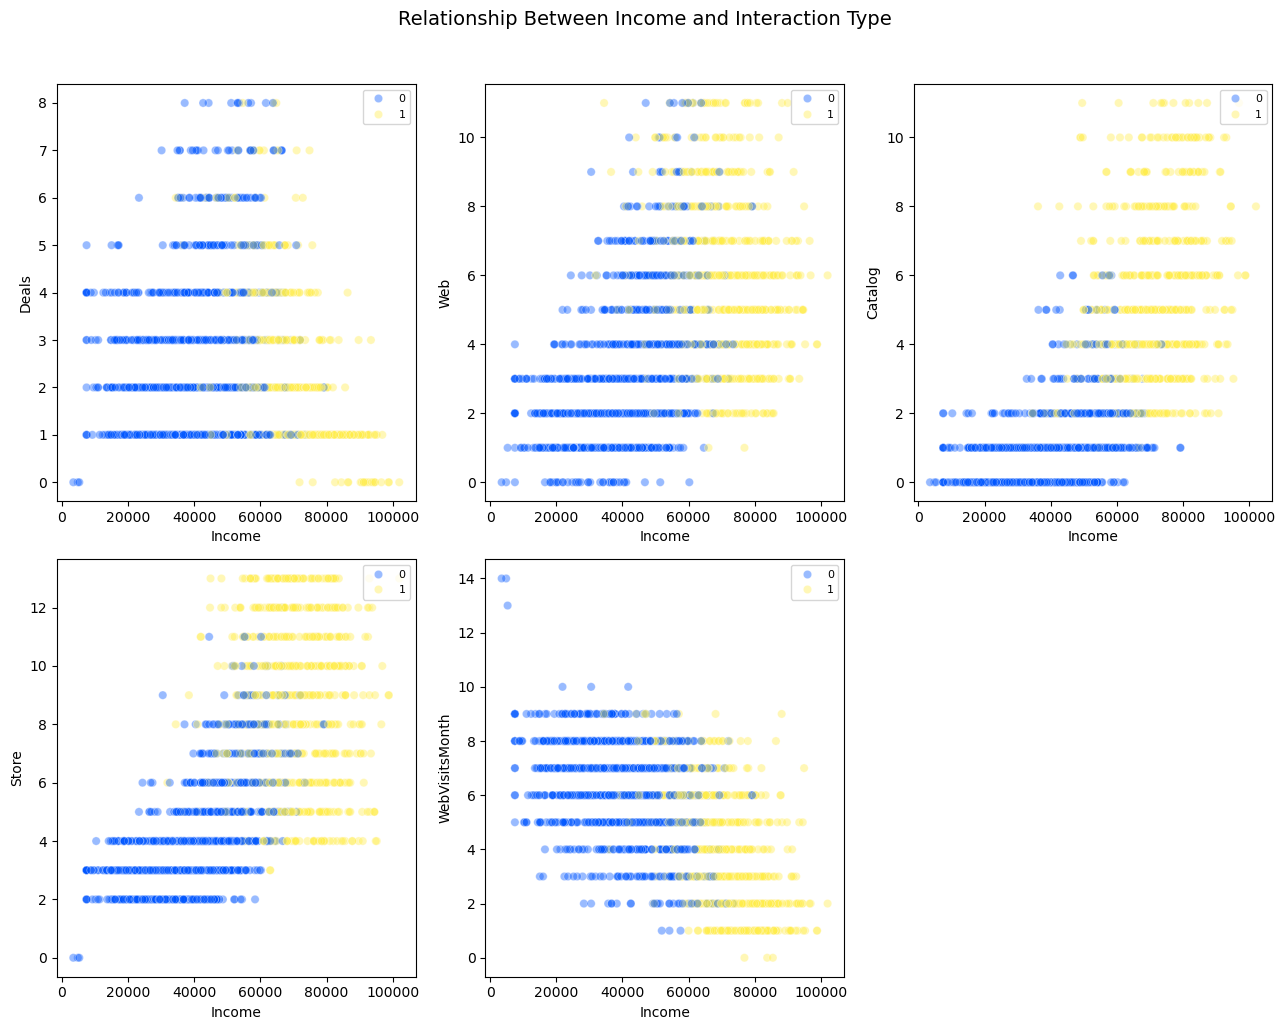

In [301]:
interactions_income(kmeans_with_pca_df, "Cluster_label_PCA")

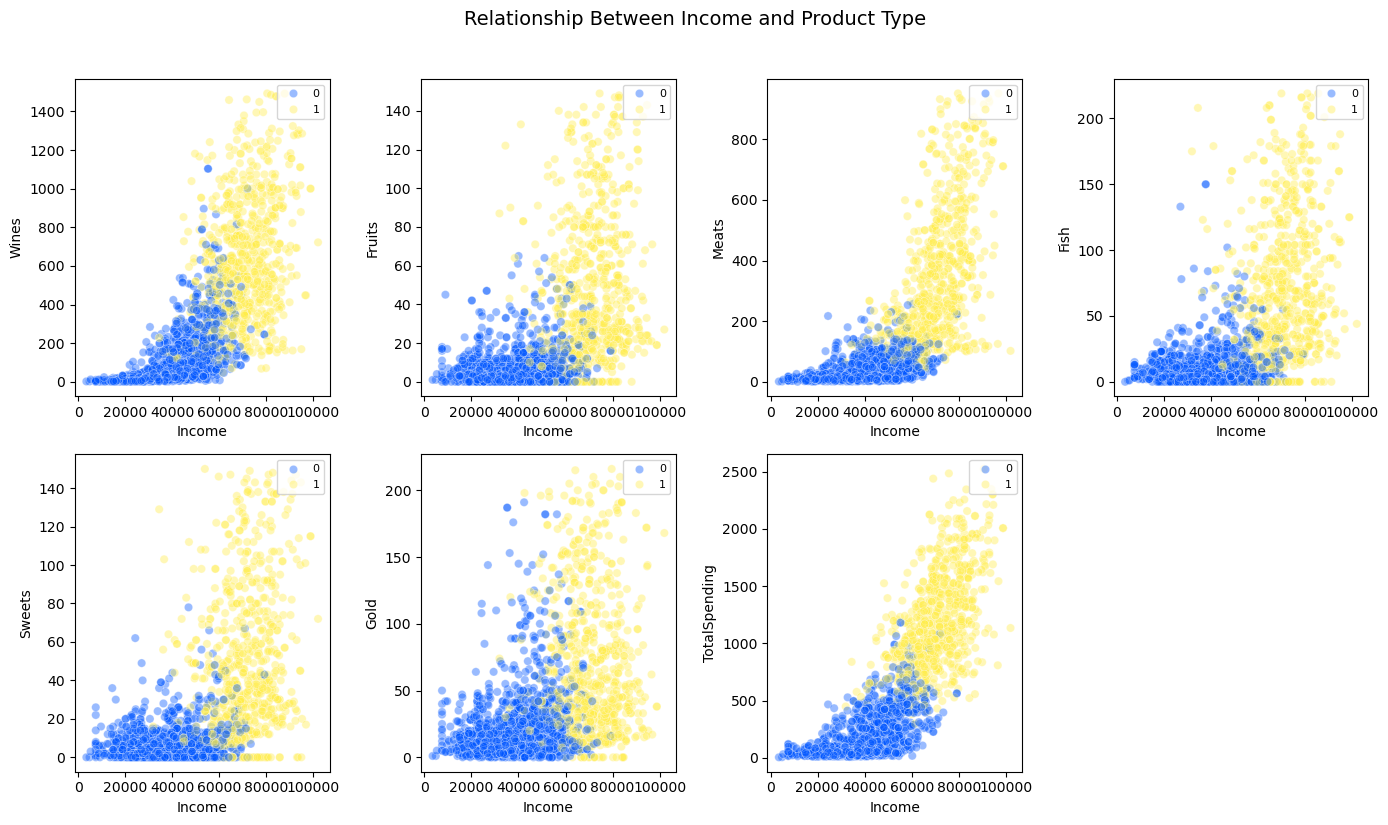

In [303]:
product_income(kmeans_with_pca_df, "Cluster_label_PCA")

## Patterns and Insights 

**The needs and resources of cluster 0 who have more children and lower incomes might be different.** 

- Campaigns may need to be adjusted to target these individuals especially since they make up the majority of our customers. This may help to drive up sales. 

**The proportion of accepted campaigns were quite low for both clusters but cluster accepted more of them**

- Alternative Marketing strategies or promotion strategies should continue to be explored

**The top selling items are meats and wines.**

- The amount spent on these items had a high to moderate correlation so placing them together might maintain or continue to grow their sales

**Cluster 0 visited the web site more times per month but web sales were lower among this group**

- Investigating what items and promotions are on the website to target the most frequent visitors might help to further understand how to target those customers and again improve sales from thai source. 


## Build Hierachical Model

In [267]:
# Using the data including categorical variables
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2017 entries, 0 to 2235
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Income          2017 non-null   float64
 1   Recency         2017 non-null   int64  
 2   Wines           2017 non-null   int64  
 3   Fruits          2017 non-null   int64  
 4   Meats           2017 non-null   int64  
 5   Fish            2017 non-null   int64  
 6   Sweets          2017 non-null   int64  
 7   Gold            2017 non-null   int64  
 8   Deals           2017 non-null   int64  
 9   Web             2017 non-null   int64  
 10  Catalog         2017 non-null   int64  
 11  Store           2017 non-null   int64  
 12  WebVisitsMonth  2017 non-null   int64  
 13  TotalSpending   2017 non-null   int64  
 14  Children        2017 non-null   int64  
 15  Age             2017 non-null   int64  
dtypes: float64(1), int64(15)
memory usage: 332.4 KB


### Construct the hierarchical cluster

**Hierarchical clustering was explored for leanring purposes but not part of the final project**

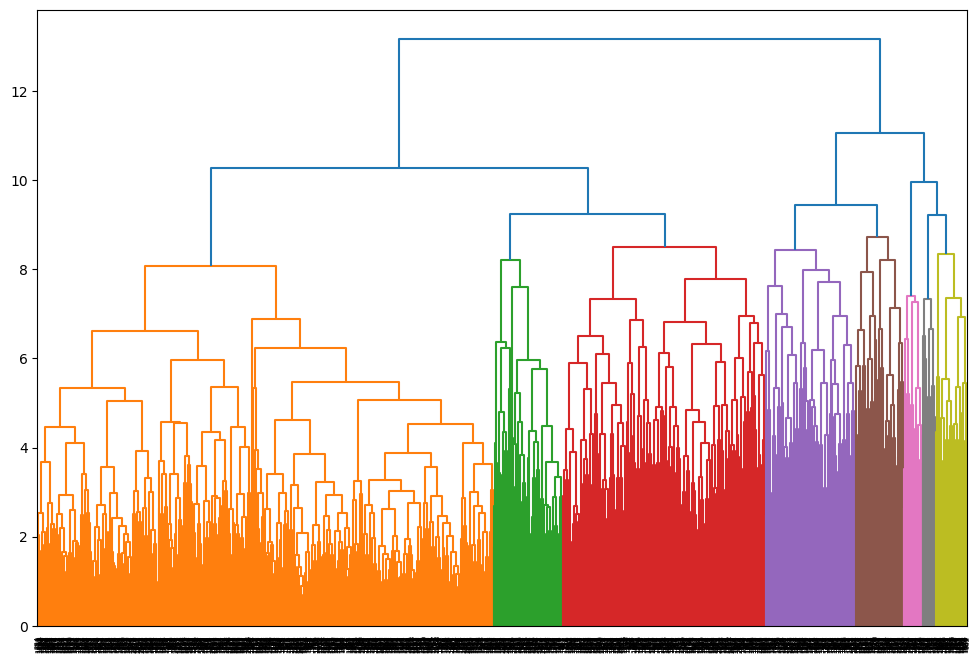

In [270]:
# Construct model using method complete

complete_clustering = linkage(scaled_data, method="complete", metric="euclidean")

plt.figure(figsize = (12, 8))
dendrogram(complete_clustering)
#plt.title()
#plt.xlabel()
#plt.ylabel()
plt.show()

In [407]:
cluster_labels = cut_tree(complete_clustering, n_clusters=4).reshape(-1, )
hierarchical_df = customer_data_outliers_removed.copy()
hierarchical_df["Cluster_labels"] = cluster_labels
#hierarchical_df["Cluster_labels"] = hierarchical_df["Cluster_labels"].map({0:1, 1:0})

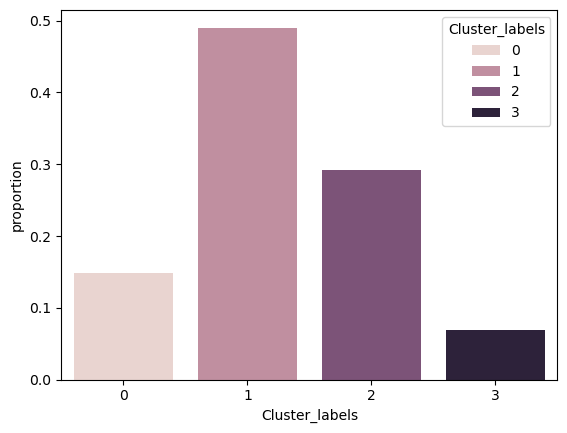

In [409]:
sns.countplot(hierarchical_df, x = "Cluster_labels", stat = "proportion",
             hue = "Cluster_labels")
plt.show()

In [411]:
hierarchical_df[cont_columns].iloc[:,1:]

Income  Recency  Wines  Fruits  Meats  Fish  Sweets  Gold  Deals  Web  \
0     58138.0       58    635      88    546   172      88    88      3    8   
1     46344.0       38     11       1      6     2       1     6      2    1   
2     71613.0       26    426      49    127   111      21    42      1    8   
3     26646.0       26     11       4     20    10       3     5      2    2   
4     58293.0       94    173      43    118    46      27    15      5    5   
...       ...      ...    ...     ...    ...   ...     ...   ...    ...  ...   
2230  34421.0       81      3       3      7     6       2     9      1    1   
2232  64014.0       56    406       0     30     0       0     8      7    8   
2233  56981.0       91    908      48    217    32      12    24      1    2   
2234  69245.0        8    428      30    214    80      30    61      2    6   
2235  52869.0       40     84       3     61     2       1    21      3    3   

      Catalog  Store  WebVisitsMonth  TotalSpending  Children  Age  
0          10      4               7           1617         0   67  
1           1      2               5             27         2   70  
2           2     10               4            776         0   59  
3           0      4               6             53         1   40  
4           3      6               5            422         1   43  
...       ...    ...             ...            ...       ...  ...  
2230        0      2               7             30         1   50  
2232        2      5               7            444         3   78  
2233        3     13               6           1241         0   43  
2234        5     10               3            843         1   68  
2235        1      4               7            172         2   70  

[2017 rows x 16 columns]

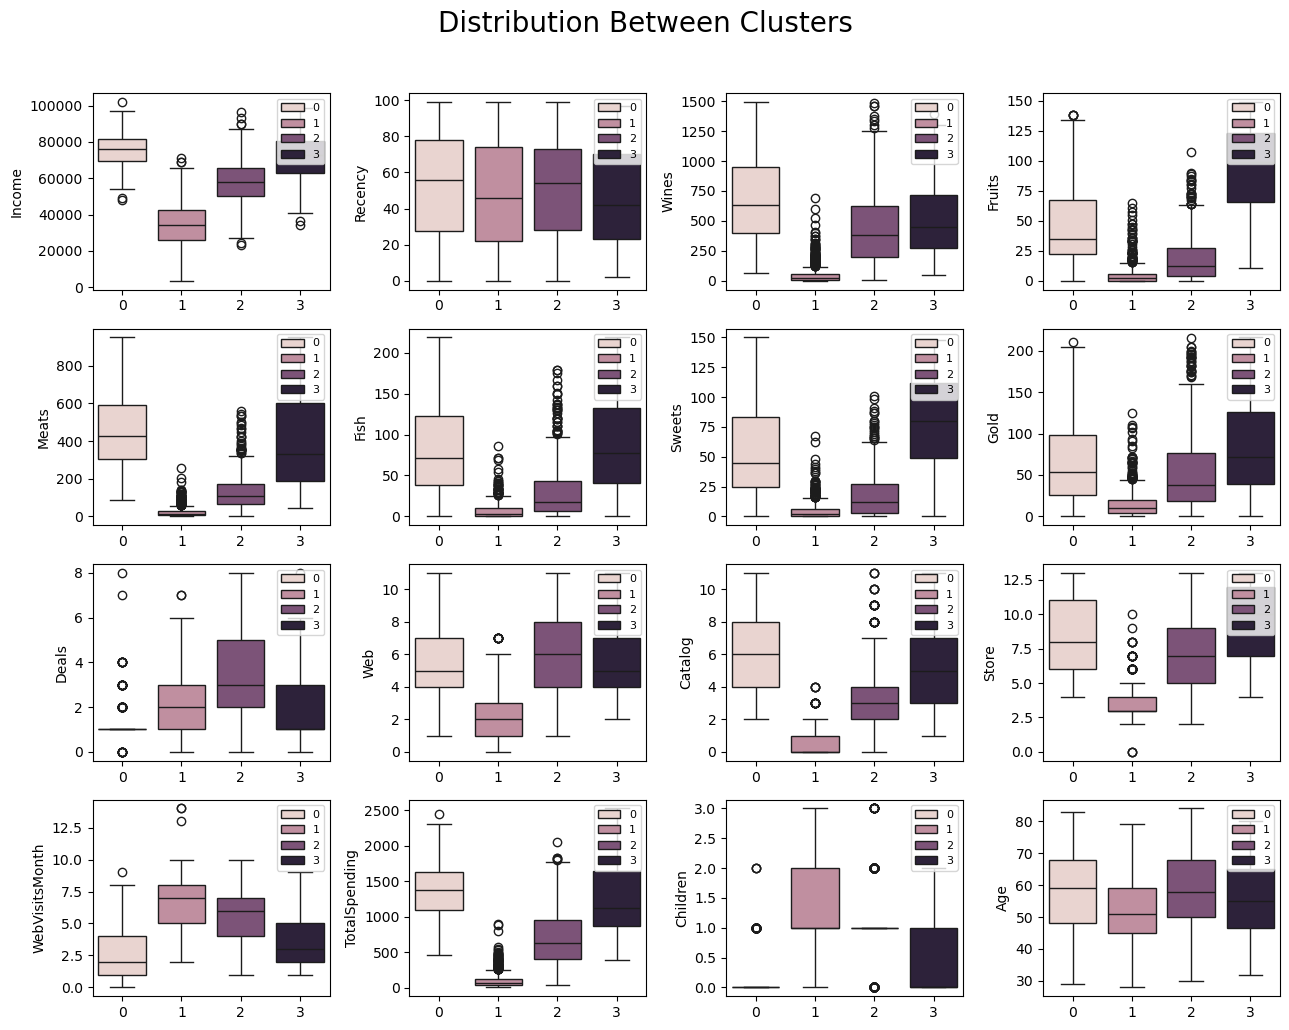

In [413]:
 plt.figure(figsize = (13,10))
    
cols = hierarchical_df[cont_columns].iloc[:,1:].columns
    
for i in range(len(cols)):
    plt.subplot(4,4,i+1)
    sns.boxplot(data = hierarchical_df[cont_columns].iloc[:,1:],
                x = cluster_labels,
                y = cols[i],
                hue = cluster_labels)
    plt.legend(fontsize = 8, loc = 'upper right')

plt.suptitle("Distribution Between Clusters", y = 1.025,
            fontsize = 20)
#plt.figtext(x = 0.5, y = -0.03, s = "Fig. 9", fontstyle = "italic", fontweight = "demibold", fontsize = 12)
plt.tight_layout()